In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statistics import variance, stdev, mode

# load packages-classifiers
from scipy import interp
from scipy import stats
from collections import Counter
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.linear_model import *
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier

# visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display_html
sns.set(style='whitegrid', palette='muted', font_scale=2)
mpl.rcParams['figure.figsize'] = (8,6)
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 15

mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

# <font color=blue>PLOTS</font>
- **sns.barplot (x, y, hue, data):** Draw a set of vertical bar plots grouped by a categorical variable (<u>confidence intervals</u> as rectangular bars)
- **sns.countplot (x, hue, data):** Show the counts of observations in each categorical bin.
- **sns.factorplot(x, y, data)**
- **sns.factorplot(x='Deck', col='Sex', hue='Survived', data=X_train, kind='count')**

# <font color=blue>FEATURE (VARIABLE) DESCRIPTIONS:</font>

**Survived:** Survived (1) or died (0)<br>
**Pclass:** Passenger's class<br>
**Name:** Passenger's name<br>
**Sex:** Passenger's sex<br>
**Age:** Passenger's age<br>
**SibSp:** Number of siblings/spouses aboard<br>
**Parch:** Number of parents/children aboard<br>
**Ticket:** Ticket number<br>
**Fare:** Fare<br>
**Cabin**: Cabin (객실)<br>
**Embarked:** Port of embarkation (탑승)<br>

# <font color=blue>DATA DESCRIPTION</font>

## 1. Import Data

In [2]:
# test = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')
# train = pd.read_csv('train.csv')
train = pd.read_csv('train.csv')
print('test.shape: {}, train.shape: {}'.format(test.shape,train.shape))
train.head()

test.shape: (418, 11), train.shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Determine size of datasets

In [4]:
n_train, m_train = train.shape
n_test, m_test = test.shape
print(n_train, m_train)

891 12


## 3. Split into X and y data

In [5]:
#  divide into X and y data: 'Survived' = y variable
X_train = pd.DataFrame(train.iloc[:, 1:m_train])     # choose all rows and columns except 1st column (column index = 0)
y_train = pd.DataFrame(train.iloc[:, 1])    # slice ony 2nd column (column index = 1) = 'Survived' as a y-variable
# print(y_train)
features = X_train.columns

X_test_original = test
X_test = test

print(features)
print(y_train.columns)
print(y_train.shape) 
X_train.head(3)
# test.head(3)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Survived'], dtype='object')
(891, 1)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 4. Check on 'Data Type'
**X_train.info()**<br>

It is important to know what types of data you are dealing with early on. **For classification, all featured will have to be in <font color=blue>integer</font> format**. Below you can see that the data is made up of floats (i.e. numbers), objects (i.e string). The floats will need to be **converted into int64 values**, some of the **objects (e.g. sex) will need to be converted into numberics, all NaN and null values will need to be filled.**

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 5. Check on 'Missing Vaues'
: Check on the missing data (NaN or NULL) and see if we can have enough number of count in each X variable as a feature<br>
**pd.DataFrame(data, columns=['A', 'B'])** : To create a new dataframe with column names

Lets check for missing data. as can be seen below there are several features with missing data. A much closer look will be taken later when I will replace the missing data. below <font color=blue>Cabin</font> is missing most of its data (78%) and thus mostly likely will a feature which cannot be used for modeling. the <font color=blue>Age</font> feature is also missing a considerable amount of data (>20%). This will be filled later by predicting the Age basaed on other features (e.g. sex, class, etc). The <font color=blue>Embarked</font> feature has very littel data missing and so can be replaced easily with **a mean value determined by class**.

In [8]:
X_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
missing_count=X_train.isnull().sum().sort_values(ascending=False)
round(missing_count/len(X_train) * 100, 2)

# #determined the missing data
def check_missing_data (dataset):
    missing_count = dataset.isnull().sum().sort_values(ascending=False)
    percent = round(missing_count/len(dataset) * 100, 2)
    df_perc = pd.concat({'Missing_Count':missing_count,'Missing_Value(%)':percent}, axis=1)
    return df_perc
    
check_missing_data (X_train)   

,Missing_Count,Missing_Value(%)
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [10]:
check_missing_data (X_test)

,Missing_Count,Missing_Value(%)
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


## 5. Basic Statistics

In [11]:
X_train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Average age is 29 years with a std of 14 years. The average fare is 32 but huge standard deviation(49..over 100% and indicating that most (68%) of people paid between the fare of -17 (= 32-49; x_bar - one_std => get $17 credit to get on the board) and 81 (=32+49: x_bar + one_std), as there are 681 unique tickets and there is no way to extract a less detailed information this feature can be dropped. There are 891 unique names but we could take a look on the title of each person to understand if the survival rate of people based on title and class.

[What does it mean when the standard deviation is higher than the mean? What does that tell you about the data?](https://www.quora.com/What-does-it-mean-when-the-standard-deviation-is-higher-than-the-mean-What-does-that-tell-you-about-the-data#:~:text=A%20sample's%20standard%20deviation%20that,the%20data%20you're%20examining.&text=A%20smaller%20standard%20deviation%20indicates,data%20are%20more%20spread%20out.)

Matthew's answer is really the best one I've read here. I'm going to try for a slightly simpler approach, hopefully to add some context for those who are not as well versed in math/stats.

A sample's standard deviation that is of greater magnitude than its mean can indicate different things depending on the data you're examining.

The mean, as Matthew stated, is really a description of location. It can be thought of as a sort of "center-of-mass" of your data.

The standard deviation is a description of the data's spread, how widely it is distributed about the mean. A smaller standard deviation indicates that more of the data is clustered about the mean. A larger one indicates the data are more spread out.

Comparing the standard deviation to the mean will tell you different things depending on the data you are working with. For example, say your data represent distances measured above and below sea level. Your mean in this case could be zero - sea level - and your standard deviation could be 20ft. This would indicate that most of your measurements fall within 20ft above and 20ft below sea level. On the other hand, what if your data represented the ages of residents in a Palm Beach condominium? In this case, your mean could be 85, and your standard deviation could be 10, indicating that most of the residents fall between the ages of 75 and 95.

In the first case, the standard deviation is greater than the mean. In the second case, it is smaller. But ultimately, their relative size matters little - it's what they tell you about the structure of the data, the way it is distributed, that is important. Using this information, you can start to make inferences about the data. For example, in the first dataset, you could determine whether a particular point was significantly higher above sea level than all others - i.e. whether it represented **a statistical anomaly that was worth investigating** - based on how many standard deviations away from the mean it was located.

One point to clarify is that the **concept of standard deviation is not limited to normally distributed data**. It is a general concept that applies to data that arise from any distribution. What is special about the standard deviation for the normal distribution is that it can be applied symmetrically about the mean, since the normal is a symmetric distribution. Though other distributions, such as the **F, T, Chi-square, Gamma, or Beta, are not consistently symmetric**, a variance - and therefore a standard deviation - can still be calculated for them.

**Std:** how widely data is distributed about the mean. The standard deviation is a description of the data's spread, how widely it is distributed about the mean. A smaller standard deviation indicates that more of the data is clustered about the mean. A larger one indicates the data are more spread out. 
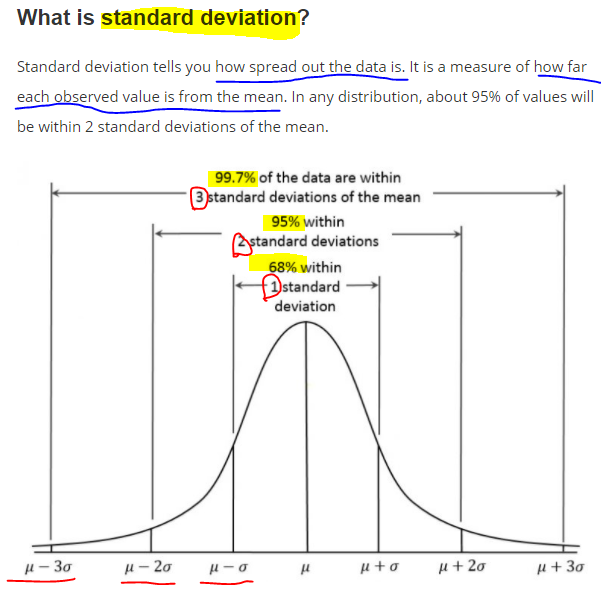


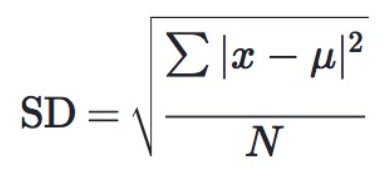

## 6. Quick Visual Glance at Data

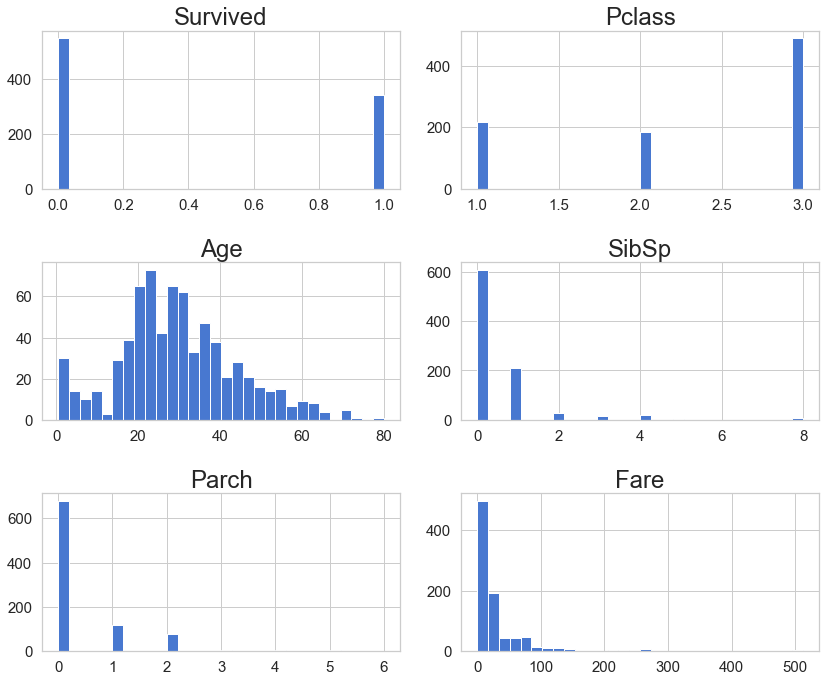

In [12]:
X_train.hist(figsize=(12,10), bins=30)
plt.tight_layout()

[sns.pairplot(df, hue, diag_kind)](https://seaborn.pydata.org/generated/seaborn.pairplot.html)<br>
**dropna(how='any', axis=0, subset=['colA', colB'], inplace=True)**<br>
- <u>how:</u> how takes string value of two kinds only (‘any’ or ‘all’). 
    - ‘any’ drops the row/column if ANY value is Null and
    - ‘all’ drops only if ALL values are null.<br>
- <u>axis:</u> 0-rows, 1-columns<br>
- <u>subset:</u> it’s an array which limits the dropping process to passed rows/columns through list.<br>

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


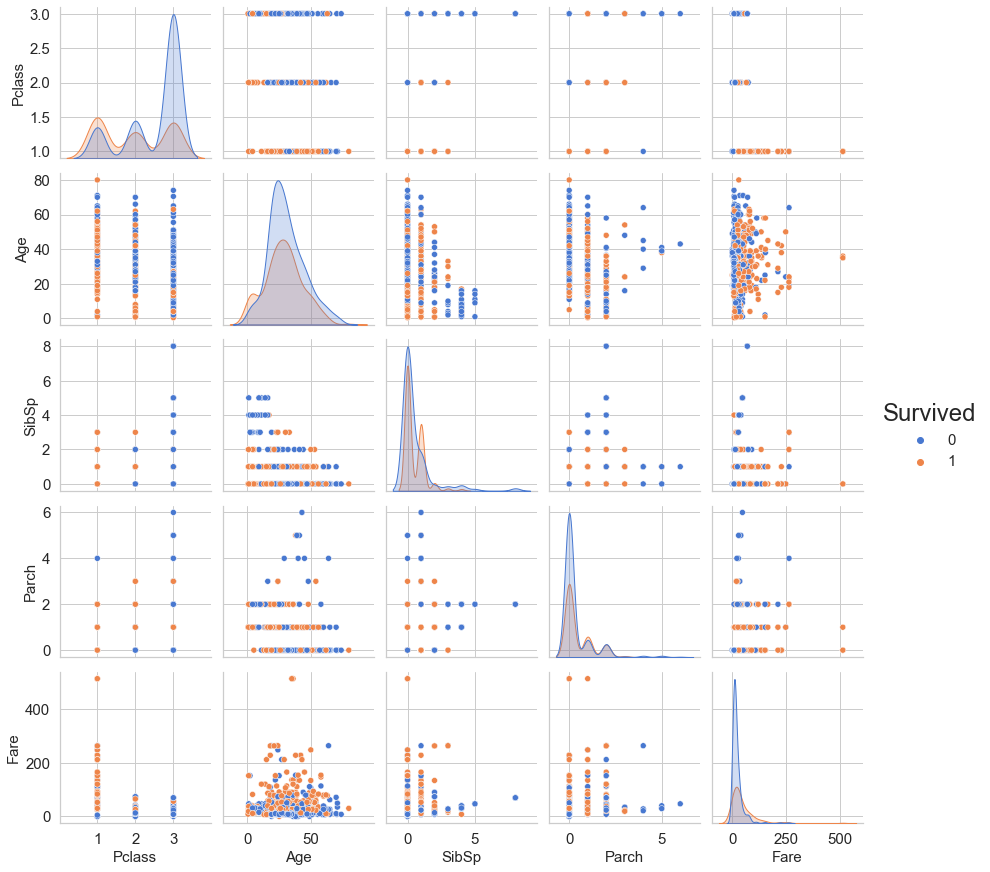

In [13]:
# dropna(how='all', axis=0) => the same as 'dropna=True'
print(X_train.columns)

# sns.pairplot(X_train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], 
#              hue = 'Survived', palette = 'muted',size = 2.2,
#              diag_kind = 'kde', dropna = True, diag_kws = dict(shade = True), plot_kws = dict(s=20) )
# sns.pairplot(X_train[X_train.columns], hue='Survived', diag_kind='kde')

sns.pairplot(X_train[X_train.columns].dropna(how='all', axis=0), hue='Survived')

## 7. Check on 'Skewness'
To see if we need to apply **log transformation** to convert into a Guassian (normal) one to discover patterns in the data and make it usable for the statistical model. OR to see if we need to choose statistical models that are robust to outliers like a **lTree-based models** but it will limit the possibility to try other models.

**how do I fix the skewness?**
The best way to fix it is <font color=blue>to perform a **log transform**</font> of the same data, with the intent to reduce the skewness. After taking logarithm of the same data the curve seems to be normally distributed, although not perfectly normal, this is sufficient to fix the issues from a skewed dataset as we saw before.

After all, you must be wondering why skewed data messes up the predictive model. The short answer would be : It affects the regression intercept, coefficients associated with the model.

[Measures of Shape: Skewness and Kurtosis](https://brownmath.com/stat/shape.htm#:~:text=2%5D%20%3D%20%E2%88%920.1098-,Interpreting,the%20left%20tail%20is%20longer.)<br>
<font color=blue>**Interpreting:**</font><br> If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer. If **skewness = 0**, the data are 'perfectly symmetrical'. But a skewness of exactly zero is quite unlikely for real-world data, so how can you interpret the skewness number?
- If skewness is less than −1 or greater than +1, the distribution is **highly skewed**.
    - **skewness < -1** : highly negatively (left) skewed
    - **skewness > +1** : highly positively (right) skewed    
- If skewness is between −1 and −½ or between +½ and +1, the distribution is **moderately skewed**.
    - **-1 <= skewness <= -0.5**
    - **+0.5 <= skewness <= +1**
- If skewness is between −½ and +½, the distribution is **approximately symmetric**.
    - **-0.5 <= skewness <= +0.5**

With a skewness of −0.1098, the sample data for student heights are approximately symmetric.

In [14]:
skewness_xtrain = pd.DataFrame(X_train.skew())
skewness_xtrain

,0
Survived,0.478523
Pclass,-0.630548
Age,0.389108
SibSp,3.695352
Parch,2.749117
Fare,4.787317


The X_train data for the following features are skewed as follows:
- **Survived** - approximately symmetric<br>
- **Pclass** - moderately skewed<br>
- **Age** - approximately symmetric<br>
- **SibSp** - highly positively (right) skewed<br>
- **Parch** - highly positively (right) skewed<br>
- **Fare** - highly positively (right) skewed<br>

In [15]:
skewness_xtest = pd.DataFrame(X_test.skew())
skewness_xtest

,0
PassengerId,0.000000
Pclass,-0.534170
Age,0.457361
SibSp,4.168337
Parch,4.654462
Fare,3.687213


## 8. Feature Correlation
Visualize with Heatmap (sns.heatmap(corr))

In [16]:
X_train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

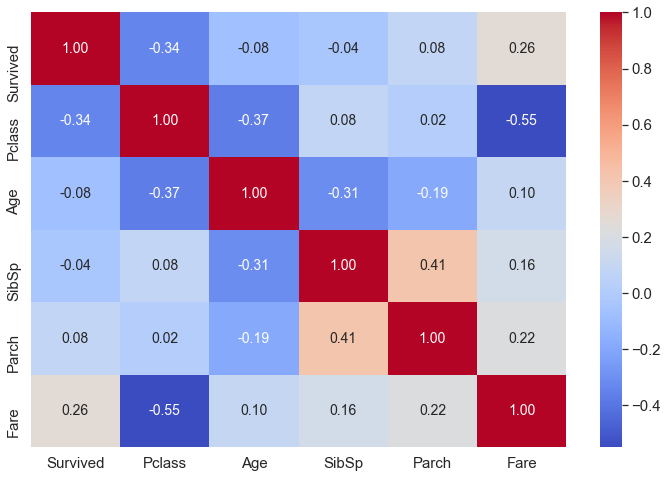

In [17]:
#show the correlations between all the features in a heatmap
# Correlation ranges from -1 to +1. 
# Values closer to 0 means there is no linear trend between the two variables. 
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(),
           cmap='coolwarm',
           annot=True,
           annot_kws={'fontsize':14},
           fmt='.2f')

it can be seen that the Pclass (0.34) and the Fare (0.26) have the stongest correlation with the survival rate. These parameters themselves are also highly correlated with each other. An early depiction may therefore be that the social position (class, money) may be a good indicator of survival. In the **feature engineering** section new features will be generated and we will also look at these correlations.

In [18]:
# highest correlated with correlation of features with 'Survived'
corr_with_survived = pd.DataFrame(X_train.corr()['Survived'].sort_values(ascending=False)[1:])
corr_with_survived

,Survived
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


Text(0, 0.5, 'Correlation Coefficients')

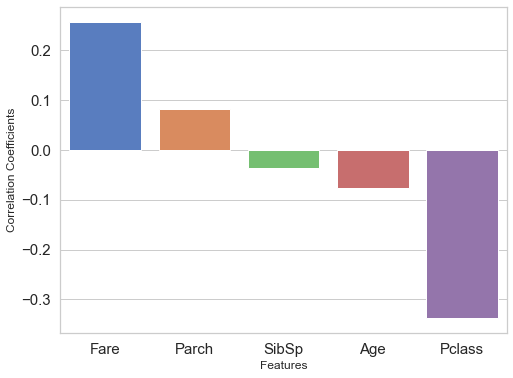

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_survived.index.values,
           y=corr_with_survived.Survived.tolist())
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficients', fontsize=12)

# <font color=blue>EXPLORATORY DATA ANALYSIS / DATA VISUALIZATION</font>

### Survival
the overall survival is shown below where 0 = died, 1 = survival. as can be seen more died than survived. however, this tells us nothing about what groups of people, age, and class of people these categories are made up of... so let's have a closer look especailly for the following 7features:
- Sex
- Age
- PClass
- Embarked
- SibSp
- Parch
- Fare   

In [20]:
X_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Text(0, 0.5, 'Count')

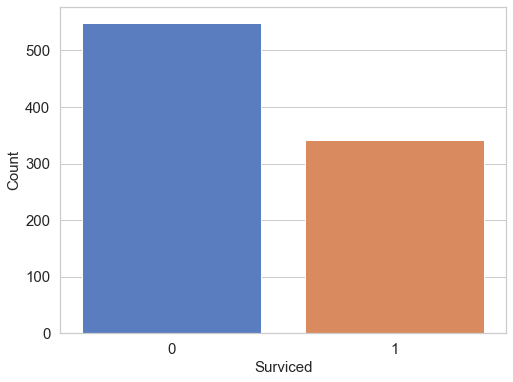

In [21]:
# Survival count 
plt.figure(figsize=(8,6))
sns.countplot(X_train['Survived'])
plt.xlabel('Surviced')
plt.ylabel('Count')

### Survival by Sex

Text(0, 0.5, 'Survived Probability')

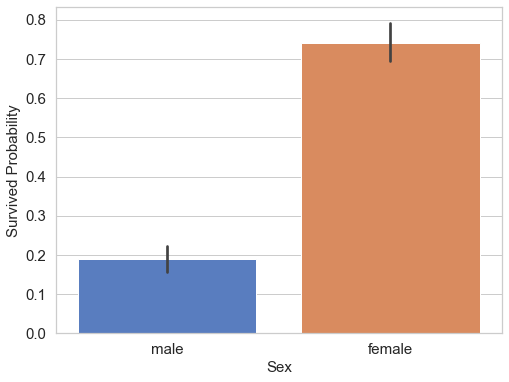

In [22]:
# Survival probability rate for male and female
plt.figure(figsize=(8,6))
sns.barplot(x=X_train['Sex'], y=X_train['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survived Probability')

<AxesSubplot:xlabel='Survived', ylabel='count'>

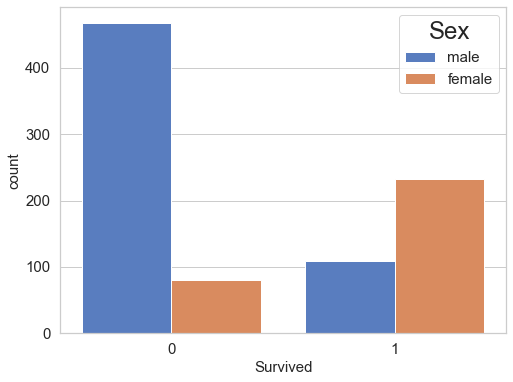

In [23]:
# Survival count for male and female
plt.figure(figsize=(8,6))
sns.countplot(X_train['Survived'], hue=X_train['Sex'])

This bar plot above shows the distribution of female and male survived and died. the opposite happened for men, more dies than survived. This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive. 


The second plots the count as a percentate of that group.  it shows that ~74% female passenger survived while only ~19% male passenger survived


the violin plot also reinforces the fact that more males die and more women survive and shows the density where more men die and women survive.


from this is is evident that  Males have less chance to survive than Female. this is probably due to the "Women and children first" mentality

### Survival by Age

In [24]:
X_train[['Survived', 'Age']].head(3)

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0


<AxesSubplot:xlabel='Survived', ylabel='Age'>

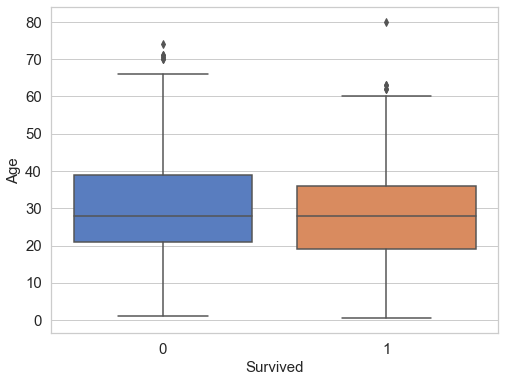

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x=X_train['Survived'], y=X_train['Age'])

[np.nanmean()](https://stackoverflow.com/questions/19852586/get-mean-value-avoiding-nan-using-numpy-in-python)
: Get mean value avoiding NaN
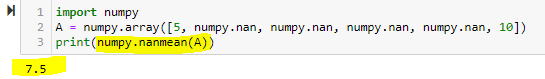

In [26]:
# provide some statistics for numerics
def stats(feature):
    mean = np.nanmean(X_train[feature])
    median = np.nanmedian(X_train[feature])
    mode = X_train[feature].mode()[0]

    std = np.nanstd(X_train[feature])
    var = np.nanvar(X_train[feature])

    min_ = X_train[feature].min()
    max_ = X_train[feature].max()
    range_ = max_ - min_
    percentile_25 = np.nanpercentile(X_train[feature], 25)
    percentile_50 = np.nanpercentile(X_train[feature], 50)
    percentile_75 = np.nanpercentile(X_train[feature], 75)
    percentile_100 = np.nanpercentile(X_train[feature], 100)

    print('Stats of %s:' % feature)
    print('\nMean: %.2f' % mean)
    print('median: %.2f' % median)
    print('mode: %.2f' % mode)
    print('\nstd: %.2f' % std)
    print('var: %.2f' % var)
    print('\nmin_: %.2f' % min_)
    print('max_: %.2f' % max_)
    print('range_: %.2f' % range_)
    print('\npercentile_25 (1st Quartile): %.2f' % percentile_25)
    print('percentile_50 (2nd Quartile): %.2f' % percentile_50)
    print('percentile_75 (3rd Quartile): %.2f' % percentile_75)
    print('percentile_100 (max): %.2f' % percentile_100)
    print('Interquartile (IQR = Q3-Q1): %.2f' % (percentile_75-percentile_25))  # It is a useful way to quantify scatter.

**[Five-number summary](https://www.graphpad.com/guides/prism/latest/statistics/stat_percentiles_and_the_median.htm)**: min, max, Q1, Q2 (median), and Q3<br>
The term five-number summary is used to describe a list of five values: the minimum, the 25th percentile, the median, the 75th percentile, and the maximum. These are the same values plotted in a box-and-whiskers plots (when the whiskers extend to the minimum and maximum; Prism offers other ways to define the whiskers).

In [27]:
stats('Age')

Stats of Age:

Mean: 29.70
median: 28.00
mode: 24.00

std: 14.52
var: 210.72

min_: 0.42
max_: 80.00
range_: 79.58

percentile_25 (1st Quartile): 20.12
percentile_50 (2nd Quartile): 28.00
percentile_75 (3rd Quartile): 38.00
percentile_100 (max): 80.00
Interquartile (IQR = Q3-Q1): 17.88


In [28]:
X_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Text(0, 0.5, 'Count')

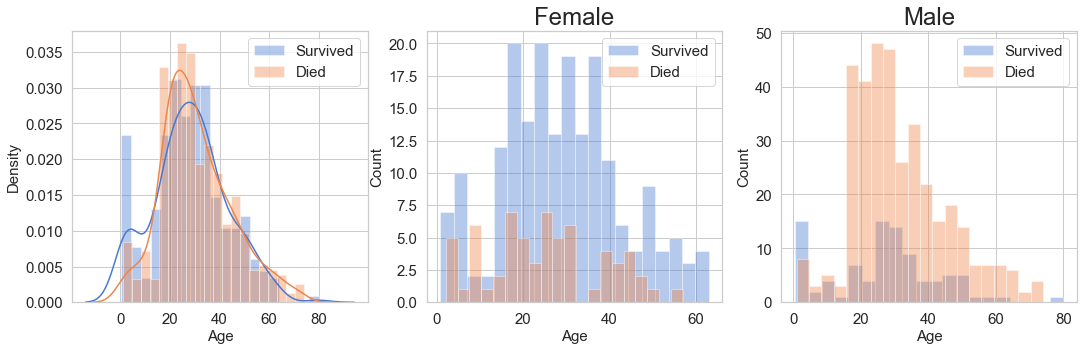

In [29]:
# X_train[X_train['Survived']==0].Age     # ages of people who died
# X_train[X_train['Survived']==1].Sex       # sex of people who survived

# plot survival number for age dependency
fig, axes = plt.subplots(1,3, figsize=(18,5))

ax = sns.distplot(X_train[X_train['Survived']==1].Age.dropna(), bins=20, ax=axes[0], label='Survived' )
ax = sns.distplot(X_train[X_train['Survived']==0].Age.dropna(), bins=20, ax=axes[0], label='Died')
ax.legend()

female = X_train[X_train['Sex']=='female']
male = X_train[X_train['Sex']=='male']

# Women - Age for Survived vs Died
ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=20, ax=axes[1], label='Survived', kde=False) 
# kde=False: set y-axis to 'count' from 'density'
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=20, ax=axes[1], label='Died', kde=False)
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Count')

# Men - Age for Survived vs Died
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=20, label='Survived', ax=axes[2], kde=False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=20, label='Died', ax=axes[2], kde=False)
ax.legend()
ax.set_title('Male')
ax.set_ylabel('Count')

**FEMALES:** have a much higher survival count than men. there are 2 intervals with a particularly high survival count: infants 0 - 5 year, and adults 16 - 38 years old

**MEN:** have a much lower survival count than women. again there are 2 intervals with relatively high survival counts, infants 0 - 5 year, and adults 20 - 32 years old

When we superimpose the two densities , we cleary see a peak correponsing (between 0 and 5) for babies and very young childrens.

The age distribution for survivors and non-survivors are very similar. One notable difference is that, of the survivors, a larger proportion were children.

In [30]:
X_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


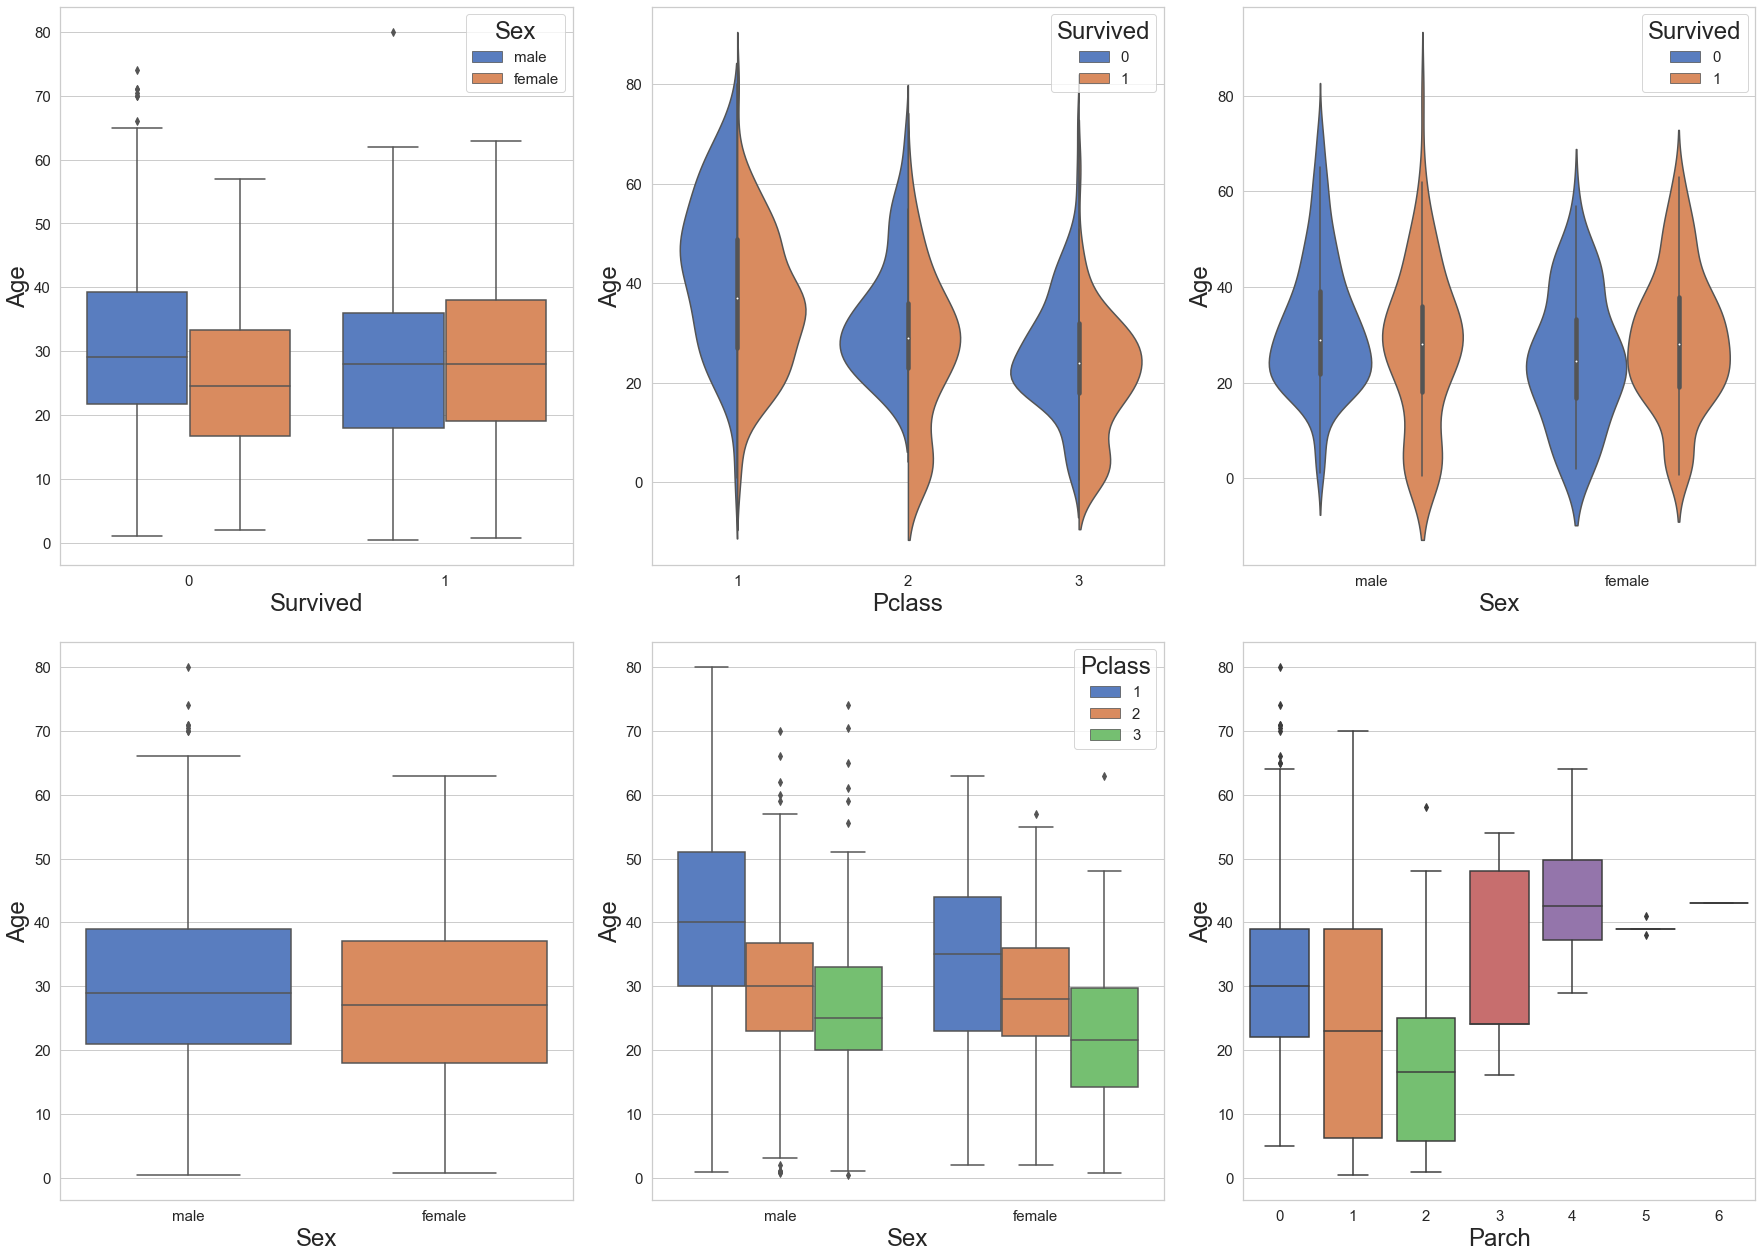

In [31]:
#  Age vs Other Features

plt.figure(figsize=(25,18))
# 1) Survived vs Age, hue=Sex
plt.subplot(2,3,1)
sns.boxplot(x='Survived', y='Age', hue='Sex',data=X_train)
plt.xlabel('Survived', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 2) Pclass vs Age, hue=Survived
plt.subplot(2,3,2)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=X_train, split=True)
plt.xlabel('Pclass', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 3) Sex vs Age, hue=Survived
plt.subplot(2,3,3)
sns.violinplot(x='Sex', y='Age', hue='Survived',data=X_train)
plt.xlabel('Sex', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 4) Sex vs Age
plt.subplot(2,3,4)
sns.boxplot(x='Sex', y='Age',  data=X_train)
plt.xlabel('Sex', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 5) Sex vs Age, hue=Pclass
plt.subplot(2,3,5)
sns.boxplot(x='Sex', y='Age', hue='Pclass', data=X_train)
plt.xlabel('Sex', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 6) Parch vs Age
plt.subplot(2,3,6)
sns.boxplot( x='Parch', y='Age', data=X_train)
plt.xlabel('Parch', fontsize=24)
plt.ylabel('Age', fontsize=24)
# # 6) SibSp vs Age
# plt.subplot(2,3,7)
# sns.boxplot( x='SibSp', y='Age', data=X_train)
# plt.xlabel('SibSp', fontsize=24)
# plt.ylabel('Age', fontsize=24)

plt.tight_layout()

1. the age distribution of both men and women are the same
2. for both men and women, the mean survival and death age increases with class
3. for both men an women, the mean age of survival and death is the same
4. in generatl the low the number of siblings/spouse a person has the larger the mean age and large distrubtion 
5. for both male and female, the higher the class the larger the age means and range.

### Survival by Class
Pclass vs Other Features

In [32]:
X_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


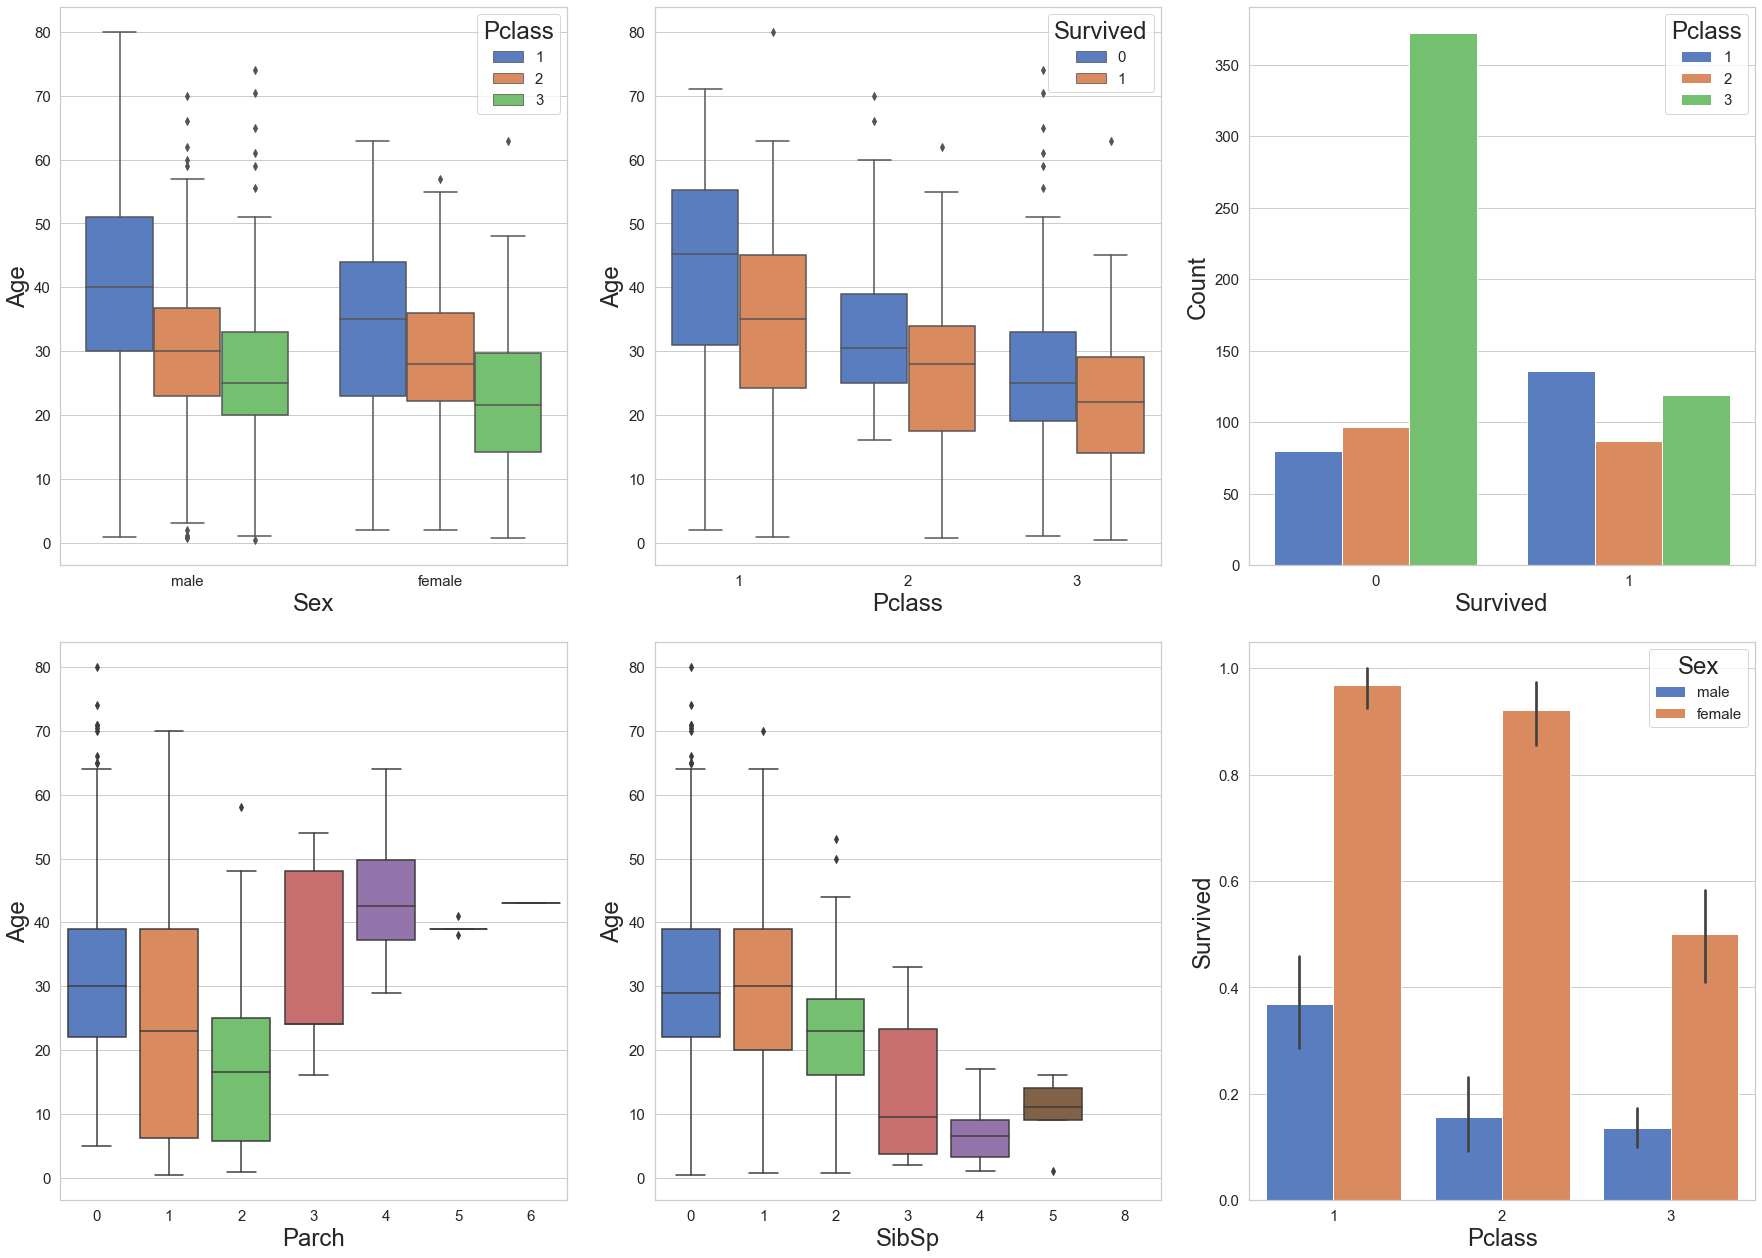

In [33]:
plt.figure(figsize=(25,18))
# 1) age vs survived
plt.subplot(2,3,1)
sns.boxplot(x='Sex', y='Age', hue='Pclass', data=X_train)
plt.xlabel('Sex', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 2) age vs sex
plt.subplot(2,3,2)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=X_train)
plt.xlabel('Pclass', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 3) Survived vs pclass
plt.subplot(2,3,3)
sns.countplot(x='Survived', hue='Pclass',data=X_train)
plt.xlabel('Survived', fontsize=24)
plt.ylabel('Count', fontsize=24)
# 4) age vs parch
plt.subplot(2,3,4)
sns.boxplot(x='Parch', y='Age', data=X_train)
plt.xlabel('Parch', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 5) age vs sibsp
plt.subplot(2,3,5)
sns.boxplot(x='SibSp', y='Age', data=X_train)
plt.xlabel('SibSp', fontsize=24)
plt.ylabel('Age', fontsize=24)
# 6) age vs pclass
plt.subplot(2,3,6)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=X_train)
plt.xlabel('Pclass', fontsize=24)
plt.ylabel('Survived', fontsize=24)

plt.tight_layout()

# 5) Pclass vs Survived

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.


(1.) the higher (1st class) the class the higher the rate of survival

(2. & 3). for both men and women the higher the class the higher the rate of survival, but in each class the women more than twice as much as the the men (in fact it )

(4. & 5.) the age range increases with increasing class. 1st class mmen are older than 1st class women, the ranges are closer for the other classes. 

(6.) the mean age increases with increasing class but the density decreases, (i.e. 1st class have less people and their mean age is older)

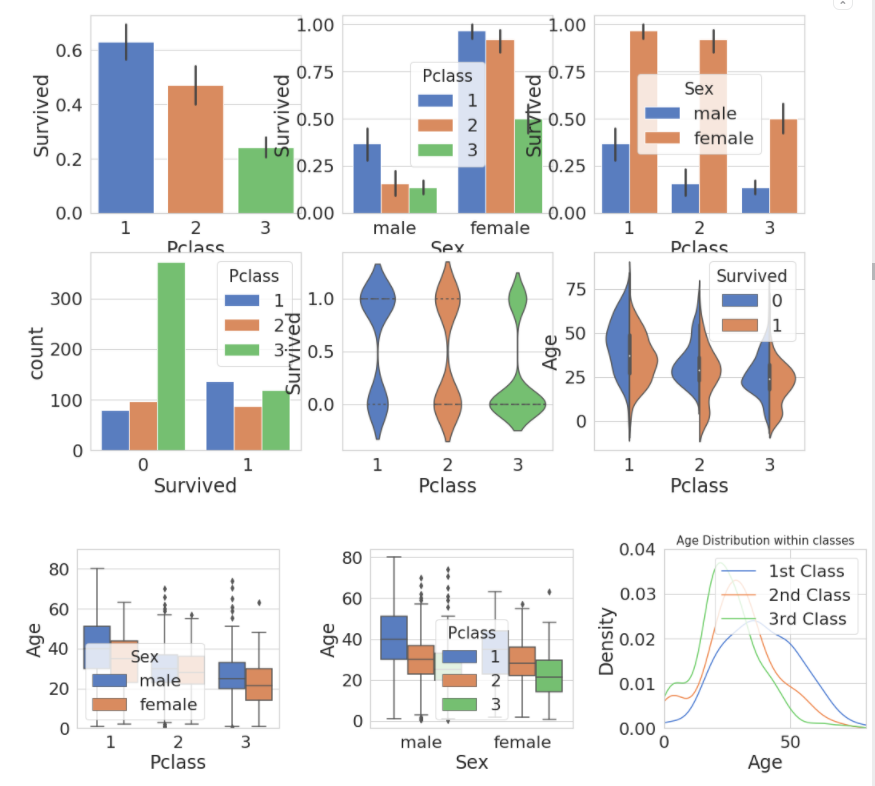

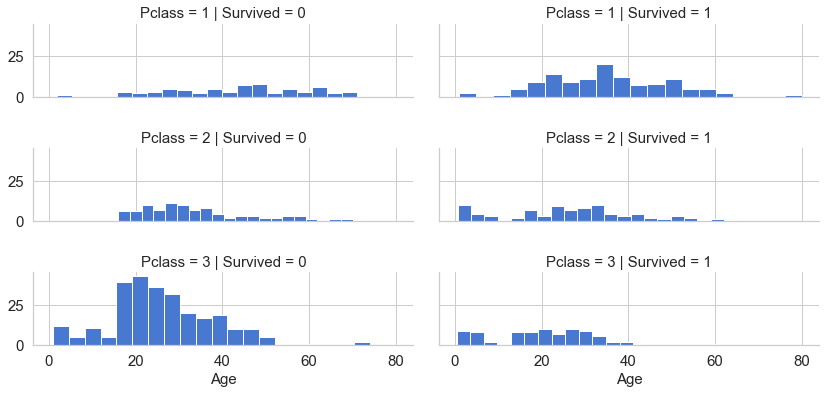

In [34]:
grid=sns.FacetGrid(data=X_train, col='Survived', row='Pclass', size=2, aspect=3)
grid.map(plt.hist, 'Age', bins=20)

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

the mode increases with decreasing class the third class will have a a large number of infants

### Survival by Embarked Lcoations

In [35]:
X_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
X_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
X_train_c = X_train[X_train['Embarked'].notnull()].copy()
X_train_c['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

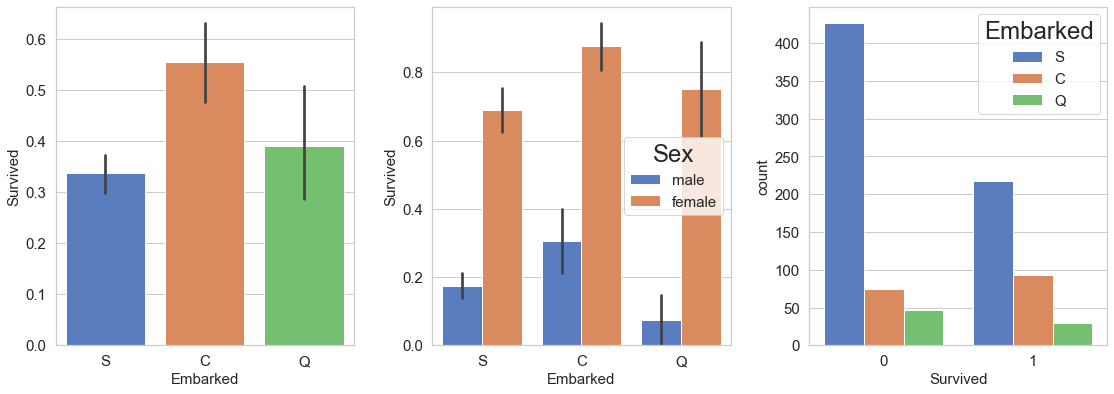

In [38]:
# Embarked vs Survived

plt.figure(figsize=(16,6))
# Embarked vs. Survived, hue=Sex - barplot
plt.subplot(1,3,1)
sns.barplot(x='Embarked', y='Survived', data=X_train)
# Embarked vs. Pclass, hue=Survived - boxplot
plt.subplot(1,3,2)
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=X_train)
# Embarked vs. Survived, hue=Plcass - countplot
plt.subplot(1,3,3)
sns.countplot(x='Survived', hue='Embarked', data=X_train)

plt.tight_layout()

1. Embarkment from location C has the highest survival rate
2. for the two sexes, the same pattern is seen but women have a much greater chance of survival (three times)
3. most people embarked at S, but these die the most. probably related to class.

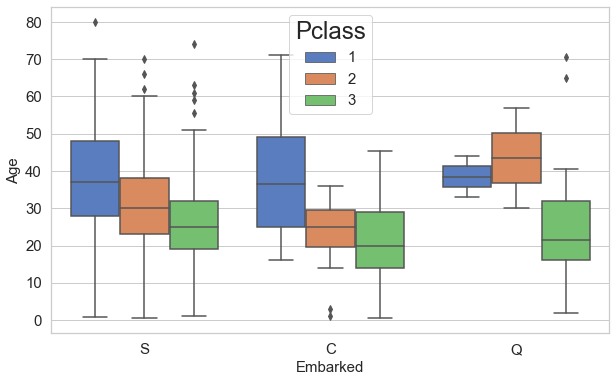

In [39]:
plt.figure(figsize=(10,6))
a = sns.boxplot(x='Embarked', y='Age', hue='Pclass', data=X_train)
# a.legend(loc='best')

It seems that passenger coming from Cherbourg (C) have more chance to survive. Below we can see that this is not related to class. perhaps it is related to Derck level... see later

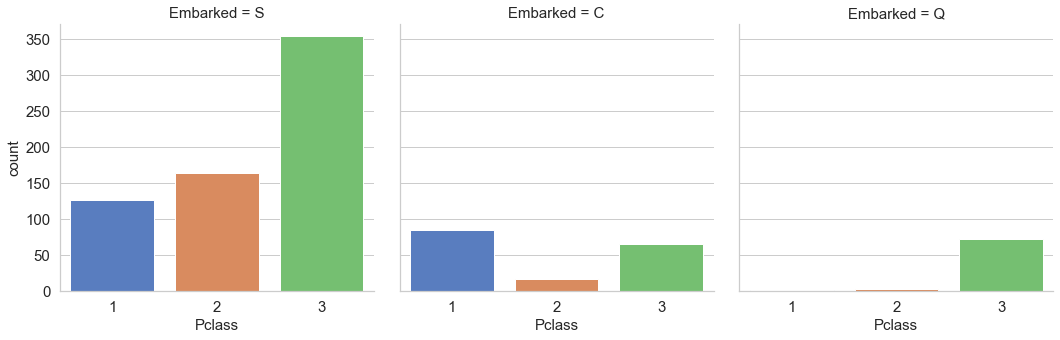

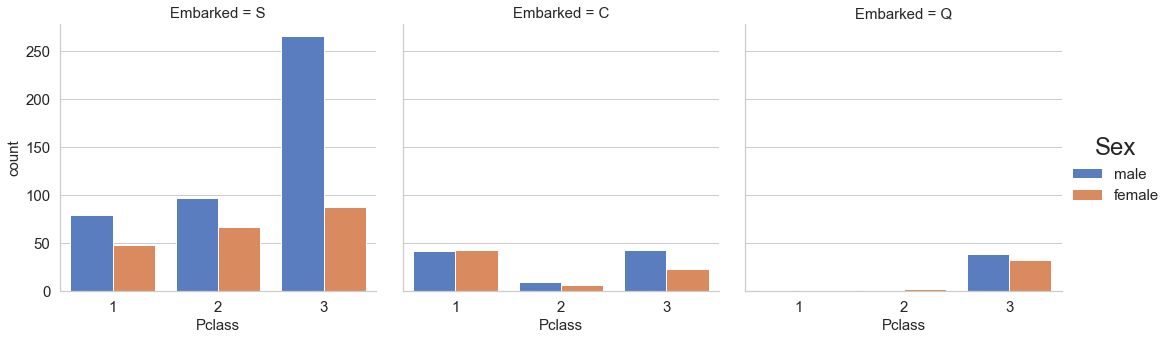

In [40]:
# Pclass vs Embarked

# plt.figure(figsize=(10,6))
sns.factorplot(x='Pclass', col='Embarked', data=X_train, kind='count')
sns.factorplot(x='Pclass', col='Embarked', hue='Sex', data=X_train, kind='count')

### SibSP & Parch

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

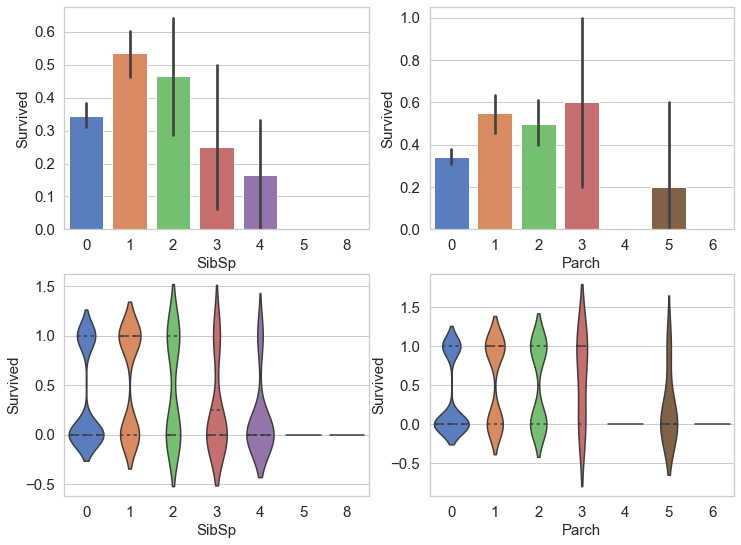

In [41]:
plt.figure(figsize=(12,9))

# SibSP vs Survived
plt.subplot(2,2,1)
sns.barplot(x='SibSp', y='Survived', data=X_train)
# Parch vs Survived
plt.subplot(2,2,2)
sns.barplot(x='Parch', y='Survived', data=X_train)
# SibSP vs Survived, hue='Sex'
plt.subplot(2,2,3)
sns.violinplot(x='SibSp', y='Survived',data=X_train, inner='quartile')

plt.subplot(2,2,4)
sns.violinplot(x='Parch', y='Survived', data=X_train, inner='quartile')



1. Small families have more chance to survive, more than single (Parch 0), medium sized families (Parch 3,4) and large families (Parch 5,6 ).

### Fare

Text(0, 0.5, 'Count')

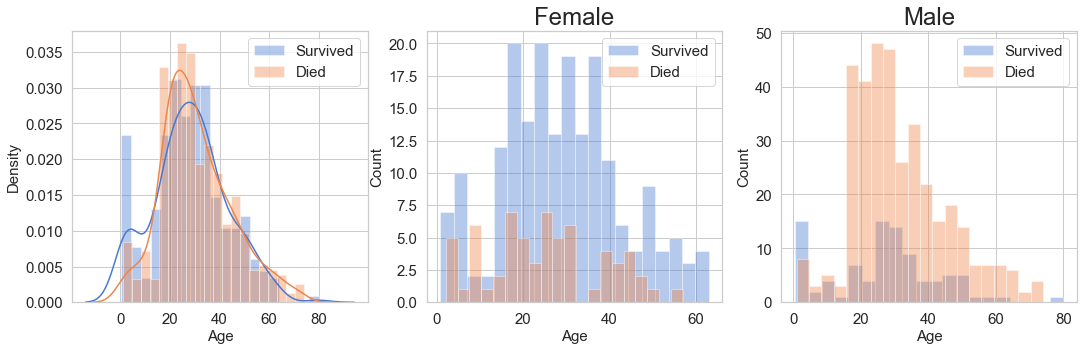

In [42]:
# plot survival number for age dependency
fig, axes = plt.subplots(1,3, figsize=(18,5))

ax = sns.distplot(X_train[X_train['Survived']==1].Age.dropna(), bins=20, ax=axes[0], label='Survived' )
ax = sns.distplot(X_train[X_train['Survived']==0].Age.dropna(), bins=20, ax=axes[0], label='Died')
ax.legend()

female = X_train[X_train['Sex']=='female']
male = X_train[X_train['Sex']=='male']

# Women - Age for Survived vs Died
ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=20, ax=axes[1], label='Survived', kde=False) 
# kde=False: set y-axis to 'count' from 'density'
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=20, ax=axes[1], label='Died', kde=False)
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Count')

# Men - Age for Survived vs Died
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=20, label='Survived', ax=axes[2], kde=False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=20, label='Died', ax=axes[2], kde=False)
ax.legend()
ax.set_title('Male')
ax.set_ylabel('Count')

In [43]:
X_train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

(0.0, 200.0)

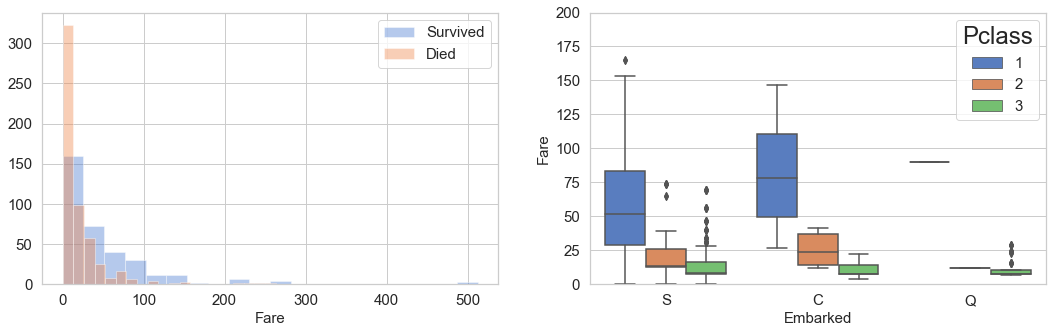

In [44]:
fig, axes = plt.subplots(1,2,figsize=(18,5))
# Survived vs Fare, distplot & kdeplot
ax = sns.distplot(X_train[X_train['Survived']==1].Fare.dropna(), ax=axes[0], bins=20, label='Survived', kde=False)
ax = sns.distplot(X_train[X_train['Survived']==0].Fare.dropna(), ax=axes[0], bins=20, label='Died', kde=False)
ax.legend()

# Fare vs Survived, boxplot
ax = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=X_train)
plt.ylim(0, 200)


In [45]:
stats('Fare')

Stats of Fare:

Mean: 32.20
median: 14.45
mode: 8.05

std: 49.67
var: 2466.67

min_: 0.00
max_: 512.33
range_: 512.33

percentile_25 (1st Quartile): 7.91
percentile_50 (2nd Quartile): 14.45
percentile_75 (3rd Quartile): 31.00
percentile_100 (max): 512.33
Interquartile (IQR = Q3-Q1): 23.09


As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class.

### Missing Data - fillna(np.nan)
Fill empty values with NaN using **fillna(np.nan)** for the entire NaN 
- **Cabin:** more than 75% data missing
- **Age:** about 20% data missing
- **Fare:** only 1 value missing
- **Embarked:** only 2 values missing

In [46]:
X_train = X_train.fillna(np.nan)
X_test = X_test.fillna(np.nan)

In [47]:
check_missing_data (X_train)  

,Missing_Count,Missing_Value(%)
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [48]:
check_missing_data (X_test)

,Missing_Count,Missing_Value(%)
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


**Age, embarked and cabin** have the most missing values. These terms can be used to determine the survival (see later). thus these missing values will need to be filled in based on their relationship with other features.

The **Embarked** feature has only 2 missing values, which can easily be filled. The **'Age'** feature, which has 177 missing values, will be filled with values based on its relationship with other features.

#### Combine the training and test data so that the operations can be performed together

In [49]:
X_full = [X_train, X_test]
# X_full

<AxesSubplot:xlabel='Embarked', ylabel='count'>

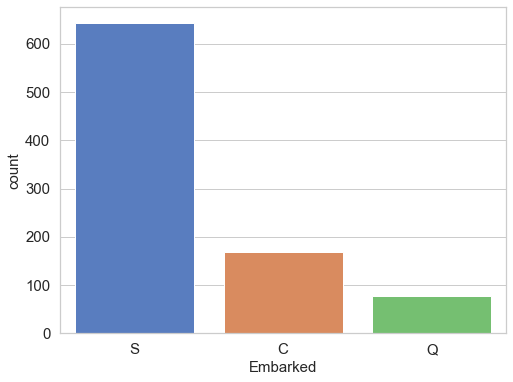

In [50]:
sns.countplot(x='Embarked', data=X_train)

#### Missing Embarked 
Only 2 values are missing - fill NaN with **'S'** since it's the most common

In [51]:
for x in X_full:
    x['Embarked'] = x['Embarked'].fillna('S')

In [52]:
# no more missing Embarked values
check_missing_data (X_train)  

,Missing_Count,Missing_Value(%)
Cabin,687,77.10
Age,177,19.87
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [53]:
check_missing_data (X_test)  

,Missing_Count,Missing_Value(%)
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


#### Missing Age 
Look at the correlation of Age with other features with sns.heatmap()

In [54]:
# a[start:end:step] => 'a' can be a list or dataframe
print(list(range(10))[::2])    # every 2nd element of the sequence
print(list(range(10))[2::])    # every items from 2nd element
print(list(range(10))[2:])     # every items from 2nd element
print(list(range(10))[::])     # entire list
print(list(range(10))[1:9:3])  # every 3rd item of the squence from 1 and 8
print(list(range(10))[:5:2])   # every 2nd element of the squence upto 4
print(list(range(10))[::-1])   # reverse list

[0, 2, 4, 6, 8]
[2, 3, 4, 5, 6, 7, 8, 9]
[2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 4, 7]
[0, 2, 4]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [55]:
X_train.head(3)
# X_train[::-1]  
# X_train[::3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age (not showing correlation result below in the heatmap).

However, 1rst class passengers are older than 2nd class passengers who are also older than 3rd class passengers.

Moreover, the more a passenger has parents/children the older he is and the more a passenger has siblings/spouses the younger he is.

Lets take a closer look at the correlations

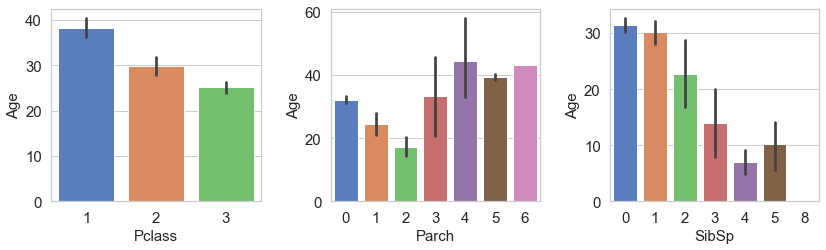

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(x='Pclass', y='Age', data=X_train)
plt.subplot(1,3,2)
sns.barplot(x='Parch', y='Age', data=X_train)
plt.subplot(1,3,3)
sns.barplot(x='SibSp', y='Age', data=X_train)
plt.tight_layout()

<AxesSubplot:>

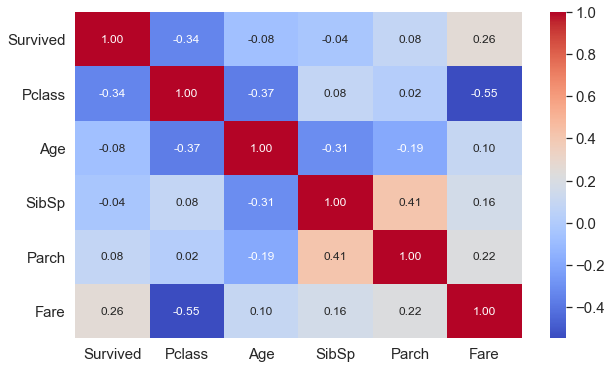

In [57]:
plt.figure(figsize=(10,6))
col = ['Age','Pclass','Parch','SibSp','Sex']
# sns.heatmap(X_train[col].corr(), annot=True, annot_kws={'fontsize':12}, cmap='coolwarm')
sns.heatmap(X_train.corr(), annot=True, annot_kws={'fontsize':12}, cmap='coolwarm', fmt='.2f')

Age is strongly correlated wtih **Parch, SibSp, and Pclass** as shown in the heatmap above.

#### Use <font color=red> Random Forest Regressor</font> to predict missing Ages both for X_train and X_test dataset using the highly correlated features as above
Fundamentally, **classification** is about predicting a label and **regression** is about predicting a quantity. ... That classification is the problem of predicting a discrete class label output for an example. That regression is the problem of predicting a continuous quantity output for an example ==> we use **Random Forest Regressor** because Age is continuous (numeric) data so for the regression (not for the classification: **not Random Forest Classifier**).

[Eigenvector and Eigenvalue](https://www.mathsisfun.com/algebra/eigenvalue.html)<br>

[sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)<br>
- **n_estimators** = The number of trees in the forest (int, default=100)
- **n_jobs** = The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. (int, default=None)
- **random_state** = Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features) => int or RandomState, default=None

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [59]:
from sklearn.ensemble import RandomForestRegressor

features = ['Age','Parch', 'SibSp', 'Pclass']

def fill_missing_ages(df_X, features):
    age_data=df_X[features]

    known_ages = age_data[age_data['Age'].notnull()].to_numpy()
    unknown_ages = age_data[age_data['Age'].isnull()].to_numpy()

    target = known_ages[:, 0]
    eigen_val = known_ages[:, 1:]
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    #     plot age distribution BEFORE filling NaN
    ax=axes[0]
    age_data['Age'].hist(bins=70, ax=ax)
    ax.set_title('Age values BEFORE filling NaN', fontsize=15)
    
    #    Apply 'RandomForestRegressor' to predict missing ages
    rfr_age = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1).fit(eigen_val, target)
    pred_age_train = rfr_age.predict(unknown_ages[:,1:])
    df_X.loc[df_X['Age'].isnull(), 'Age'] = pred_age_train     # set predicted ages to the missing values in the original column 'Age'
    df_X['Age'] = df_X['Age'].astype(int)               # convert float to int
    
    #     plot age distribution AFTER filling NaN
    ax=axes[1]
    df_X['Age'].hist(bins=70, ax=ax)
    ax.set_title('Age values BEFORE filling NaN', fontsize=15)
    
    return df_X

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


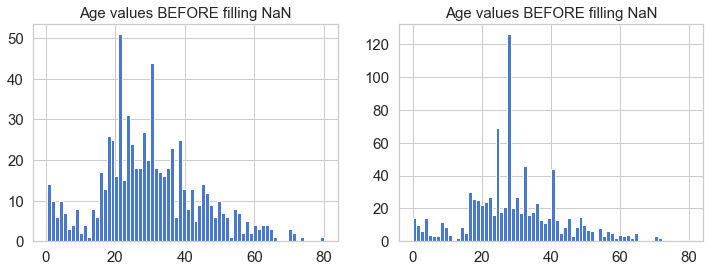

In [60]:
fill_missing_ages(X_train, features).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


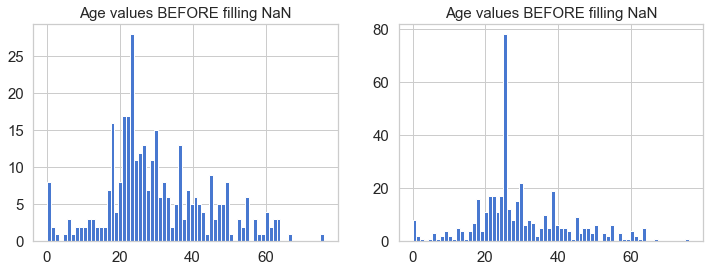

In [61]:
fill_missing_ages(X_test, features).head()

#### Missing Cabin 
Cabin has a lot of data missing (more than 75%). the replacement of this feature is performed during the **feature engineering** section... see below

#### Missing Fare 
Shows a large standard deviation (widely spread) so we will fillna with **'median'** of the NaN for each Pclass

In [62]:
# x = X_train and X_test
for x in X_full:
    x['Fare'].fillna(x.groupby(['Pclass'])['Fare'].transform('median'), inplace=True)
    x['Fare_group'] = x['Fare']

X_test['Fare'].isnull().unique()
X_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,9.6875


In [63]:
check_missing_data (X_test)  

,Missing_Count,Missing_Value(%)
Cabin,327,78.23
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


# <font color=blue>FEATURE ENGINEERING</font>

In [64]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,53.1000
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,8.0500


### 1) Cabin and Deck level - Cabin vs. No Cabin Survival Rate 
more than 75% data are missing - will see how many people have cabin and if it's (whether has cabin or not) related to survival rate

In [65]:
# alpha-numeric values
X_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [66]:
X_train['Cabin'].notnull()[:5]

0    False
1     True
2    False
3     True
4    False
Name: Cabin, dtype: bool

In [67]:
# 0: has no Cabin value, 1: has Cabin value
for x in X_full:
    x['cabin_bool'] = x['Cabin'].notnull().astype(int)    # convert True (NaN: has no value) to 1 and False(not NaN: has value) 0 of int

In [68]:
X_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group,cabin_bool
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,0


<AxesSubplot:xlabel='cabin_bool', ylabel='Survived'>

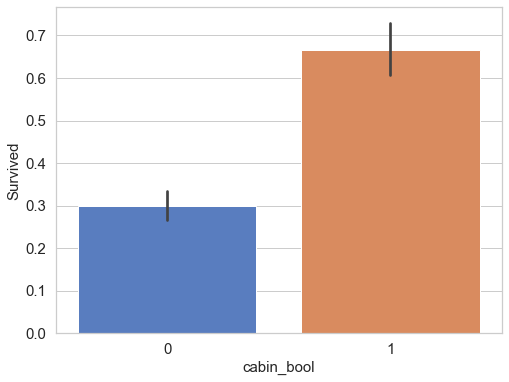

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(x='cabin_bool', y='Survived', data=X_train)

In [70]:
for c in X_train[['Cabin']]:
    print(c[0])    

C


In [71]:
# split letters from the numeric value 
# x != x: True(NaN) or False (not NaN), 'Other' = True (= missing values), otherwise get only first letter as a value
# i.isalpha() or i.isdigit()

def extract_cabin(x):
    return x != x and 'Other' or x[0]

for x in X_full:
    x['Cabin'] = x['Cabin'].apply(extract_cabin)
    x['Deck'] = x['Cabin']

train_deck = pd.DataFrame(X_train.groupby('Deck').size())    # size() = number of count for each group
train_deck

,0
Deck,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
Other,687
T,1


In [72]:
test_deck = pd.DataFrame(X_test.groupby('Deck').size())
test_deck

,0
Deck,
A,7
B,18
C,35
D,13
E,9
F,8
G,1
Other,327


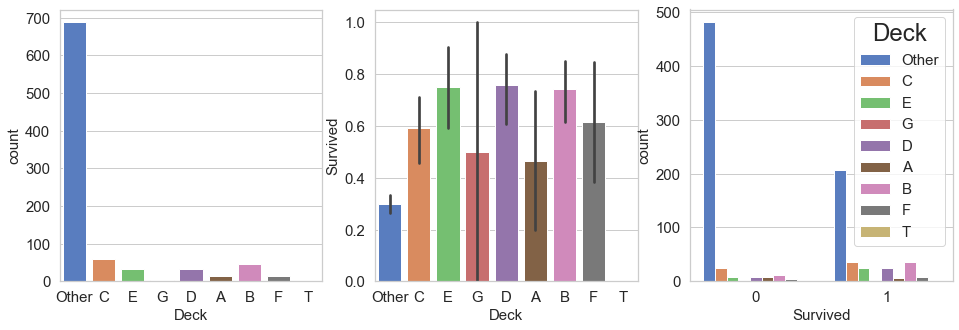

<Figure size 1152x360 with 0 Axes>

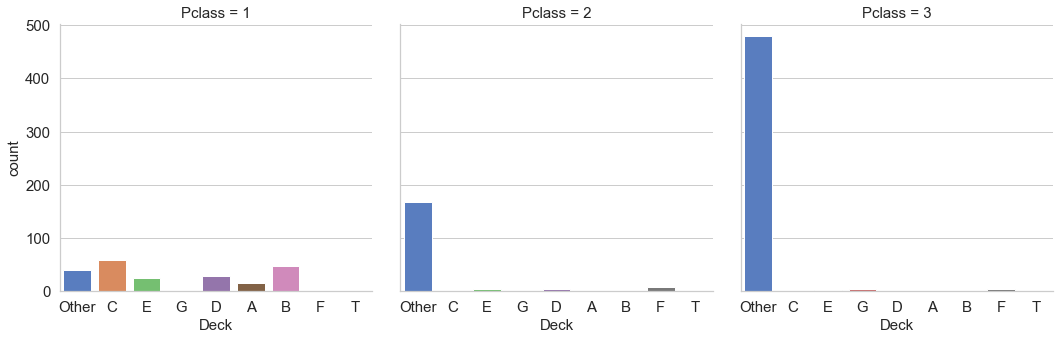

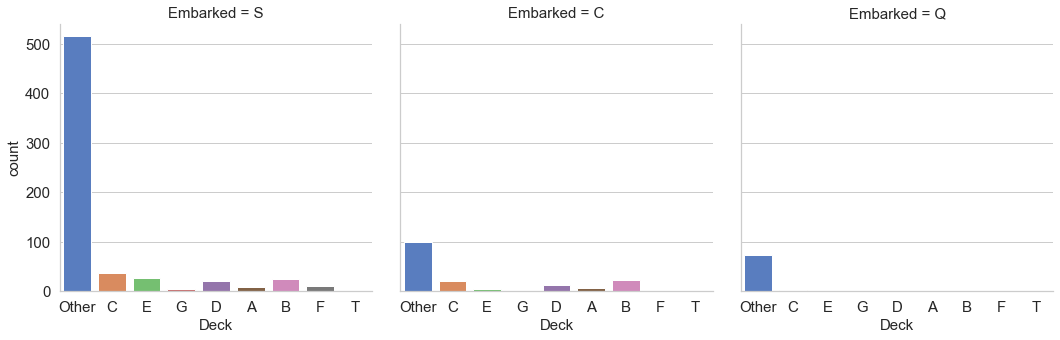

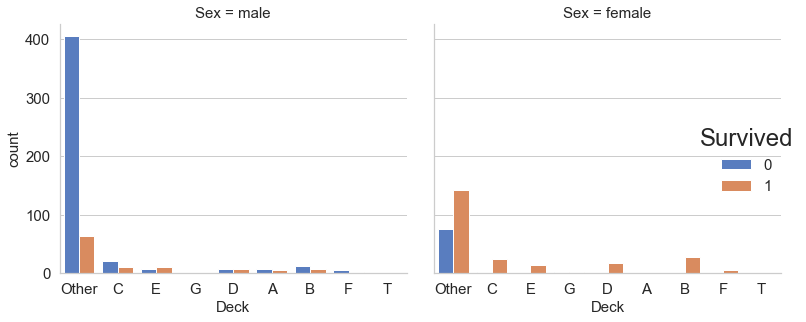

In [73]:
# plot the results of Cabin (Deck) for X_train data
plt.figure(figsize=(16,5))
# countplot: deck vs count
plt.subplot(1,3,1)
sns.countplot(x='Deck', data=X_train)
# barplot: deck vs survived
plt.subplot(1,3,2)
sns.barplot(x='Deck', y='Survived', data=X_train)
# countplot: survived, hue=deck
plt.subplot(1,3,3)
sns.countplot(x='Survived', hue='Deck',data=X_train)

plt.figure(figsize=(16,5))
# factorplot: deck, col=pclass, kind='count'
sns.factorplot(x='Deck', col='Pclass', data=X_train, kind='count')
# factorplot: deck, col=embarked, kind='count'
sns.factorplot(x='Deck', col='Embarked', data=X_train, kind='count')
# factorplot: deck vs sex, hue=survived
sns.factorplot(x='Deck', col='Sex', hue='Survived', data=X_train, kind='count')
plt.tight_layout()

we can see that passengers with a cabin have generally more chance to survive than passengers without.

It is particularly true for cabin B, C, D, E and F.

most people where the deck is unknown are from the 3rd class

In [74]:
X_train['Name'][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

### 2) Family size, Alone
[regex](https://www.programiz.com/python-programming/regex)<br>
**\w:**<br>
Matches Unicode word characters; this includes most characters that can be part of a word in any language, as well as numbers and the underscore. If the ASCII flag is used, only [a-zA-Z0-9_] is matched.

**+:**<br>
Matches one or more occurrences of the pattern left to it

Calculate family size for both X_train and X_test dataset
- **family_size** = Parch + SibSp +1 (when Parch = SibSp = 0, family_size = 1 = **alone**)
- **surname (성)** = before the comma ( , ): **x['Name'].str.split(',', 1).str[0]**  => split by 1st ',' and return str before the comma 

str.extract('(\w+),', expand=False) => pattern = **'(\w+),'**: find any alphanumeric (digits and alphabets, not symbols like % and &) char that is left to the comma 

In [75]:
# Create new features
for x in X_full:
    x['Family_size'] = x['Parch'] + x['SibSp'] + 1
    x['Alone'] = [1 if i < 2 else 0 for i in x['Family_size']]     # if family size = 0 or 1 then 1 = Alone
#     x['Surname'] = x['Name'].str.extract('(\w+),', expand=False)   # expand=True: return a df with one column per capture group, expand=False: return a Series/Index if there is one capture group or DataFrame if there are multiple capture groups.
    x['Surname'] = x['Name'].str.split(',', 1).str[0]    
    x['Large_family'] = [1 if i > 5 else 0 for i in x['Family_size']]   # if family size is 6 or more then 1 = large family
X_train.head()   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group,cabin_bool,Deck,Family_size,Alone,Surname,Large_family
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Other,S,7.2500,0,Other,2,0,Braund,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,71.2833,1,C,2,0,Cumings,0
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Other,S,7.9250,0,Other,1,1,Heikkinen,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,53.1000,1,C,2,0,Futrelle,0
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Other,S,8.0500,0,Other,1,1,Allen,0


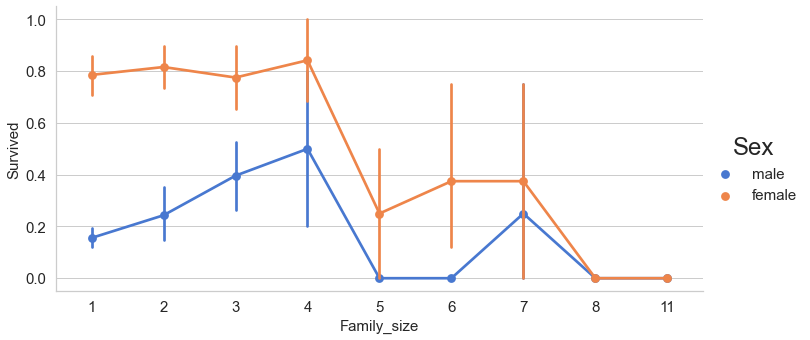

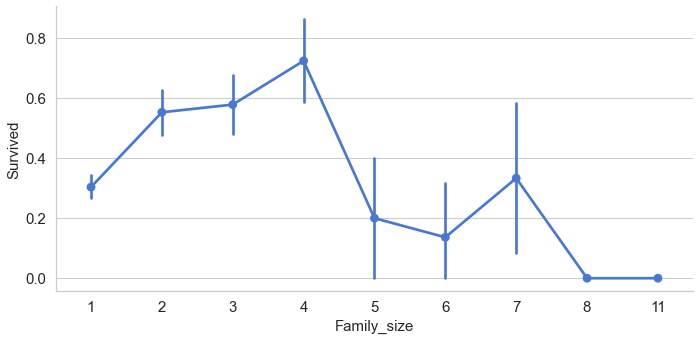

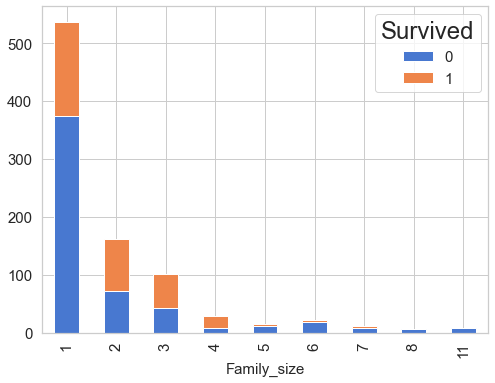

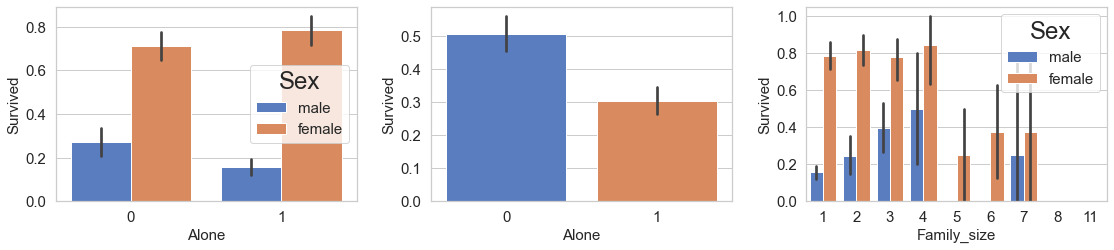

In [76]:
# plot: 'aspect(optional)' - This parameter take float value, Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.
# factorplot: x=Family_size, y=Survived, hue=sex, aspect=2
sns.factorplot(x='Family_size', y='Survived', hue='Sex', data=X_train, aspect=2)
# factorplot: x=Family_size, y=Survived, aspect=2
sns.factorplot(x='Family_size', y='Survived', data=X_train, aspect=2)
# crosstab(= stacked barplot): 
pd.crosstab(X_train['Family_size'], X_train['Survived']).plot(kind='bar', stacked=True)

plt.figure(figsize=(16,4))
# barplot: x=alone, y=Survived, hue=sex
plt.subplot(1,3,1)
sns.barplot(x='Alone', y='Survived', hue='Sex',data=X_train)

# barplot: x=alone, y=Survived
plt.subplot(1,3,2)
sns.barplot(x='Alone', y='Survived',data=X_train)

plt.subplot(1,3,3)
sns.barplot(x='Family_size', y='Survived', hue='Sex', data=X_train)
plt.tight_layout()

Assumption: the less people was in your family the faster you were to get to the boat. The more people they are the more managment is required. However, if you had no family members you might wanted to help others and therefore sacrifice.

The females traveling with up to 2 more family members had a higher chance to survive. However, a high variation of survival rate appears once family size exceeds 4 as mothers/daughters would search longer for the members and therefore the chanes for survival decrease.

Alone men might want to sacrifice and help other people to survive.

### 3) Title
Get title from Name column for both X_train and X_test dataset


In [77]:
X_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group,cabin_bool,Deck,Family_size,Alone,Surname,Large_family
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Other,S,7.2500,0,Other,2,0,Braund,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,71.2833,1,C,2,0,Cumings,0


[re.search(pattern, str)](https://www.programiz.com/python-programming/regex)<br>
The method looks for the **1st location** where the RegEx pattern produces a match with the string.

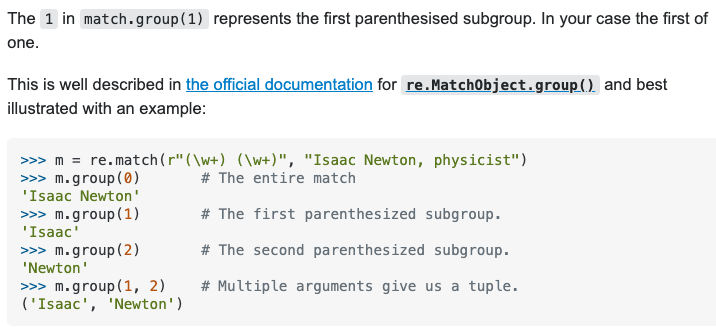

In [78]:
import re
s = 'Cumings, Mrs. John Bradley (Florence Briggs Th..female)'
re.search('([A-Za-z]+)\.', s)   # find any word (paranthesis()) that is left to the period(.)

<re.Match object; span=(9, 13), match='Mrs.'>

In [79]:
# create a new feature, 'Title' from Name column
def get_title(name):
    title = re.search('([A-Za-z]+)\.', name)
    if title:
        return title.group(1)
    return ""

for x in X_full:
    x['Title'] = x['Name'].apply(get_title)
    x['Title'] = x['Title'].replace(['Lady','Sir','Don','Countess','Jonkheer','Dona'], 'Noble')
    x['Title'] = x['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Officer')
    x['Title'] = x['Title'].replace('Mlle', 'Miss')
    x['Title'] = x['Title'].replace('Ms', 'Miss')
    x['Title'] = x['Title'].replace('Mme', 'Mrs')

print(X_train['Title'].unique())
print(X_test['Title'].unique())
 

titles_train = pd.DataFrame(X_train['Title'].value_counts())
titles_test = pd.DataFrame(X_test['Title'].value_counts())
# Group all non-common titles into one single grouping 'Rare'


['Mr' 'Mrs' 'Miss' 'Master' 'Noble' 'Officer']
['Mr' 'Mrs' 'Miss' 'Master' 'Officer' 'Noble']


In [80]:
titles_train

,Title
Mr,517
Miss,185
Mrs,126
Master,40
Officer,18
Noble,5


In [81]:
titles_test

,Title
Mr,240
Miss,79
Mrs,72
Master,21
Officer,5
Noble,1


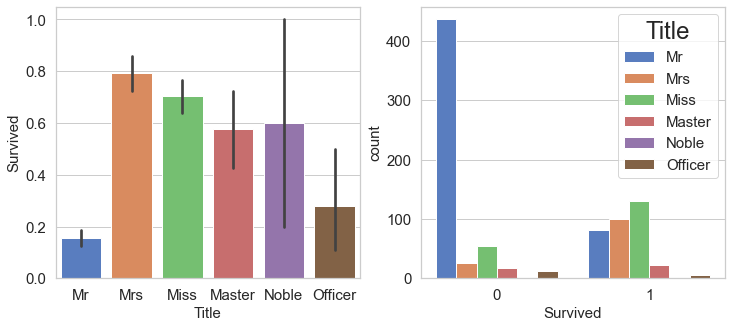

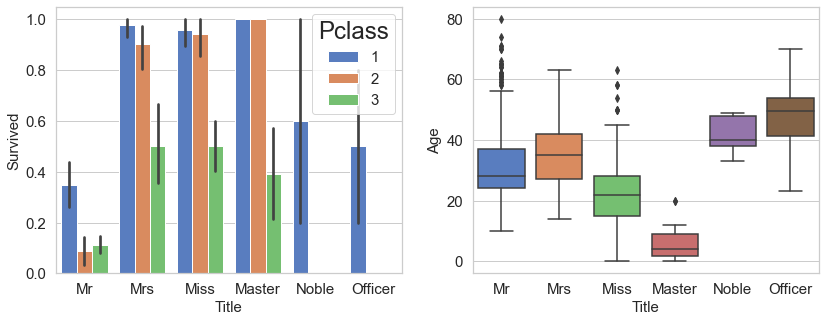

In [82]:
# plot
plt.figure(figsize=(12,5))
# barplot: title vs survived
plt.subplot(1,2,1)
sns.barplot(x='Title', y='Survived', data=X_train)
# countplot: survived, hue=title
plt.subplot(1,2,2)
sns.countplot('Survived', hue='Title', data=X_train)
# barplot: title vs survived, hue=pclass

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Title', y='Survived', hue='Pclass',data=X_train)
# boxplot: title vs age
plt.subplot(1,2,2)
sns.boxplot(x='Title', y='Age', data=X_train)
plt.tight_layout()

- the higher class the higher survival rate
- Mr has the lowest survival rate
- higher class of Mrs, Miss are survived
- Noble and officer are oldest group and Master is in the youngest group and has the highest survival rate for the class 1 and 2

### 4) Age Category
Create age groups by age range

In [83]:
X_train[['Age']].describe()

,Age
count,891.000000
mean,29.408530
std,13.459439
min,0.000000
25%,21.500000
50%,28.000000
75%,37.000000
max,80.000000


In [84]:
X_train['Age'].isnull().unique()

array([False])

In [85]:
# need to start with -1 instead of 0 so that 0 is included in the category 'Baby'
age_cat = pd.cut(X_train['Age'],
                [-1, 3, 12, 18, 35, 65, 80],
                labels=['Baby','Child','Teenager','Young Adult','Adult','Senior'])

for x in X_full:
    x['age_cat'] = age_cat
    x['Age*Pclass'] = x['Age']*x['Pclass']
    
X_train[['age_cat', 'Age', 'Pclass','Age*Pclass']].info()
X_train[['age_cat', 'Age', 'Pclass','Age*Pclass']][260:265]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age_cat     891 non-null    category
 1   Age         891 non-null    int64   
 2   Pclass      891 non-null    int64   
 3   Age*Pclass  891 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 22.1 KB


,age_cat,Age,Pclass,Age*Pclass
260,Young Adult,28,3,84
261,Baby,3,3,9
262,Adult,52,1,52
263,Adult,40,1,40
264,Young Adult,28,3,84


In [86]:
train_ageCat = pd.DataFrame(X_train['Age'].value_counts())
test_ageCat = pd.DataFrame(X_test['Age'].value_counts())
train_ageCat

,Age
28,126
24,46
41,29
22,27
30,27
...,...
12,1
66,1
53,1
80,1


In [87]:
test_ageCat

,Age
26,66
30,22
22,17
21,17
24,17
...,...
15,1
67,1
11,1
76,1


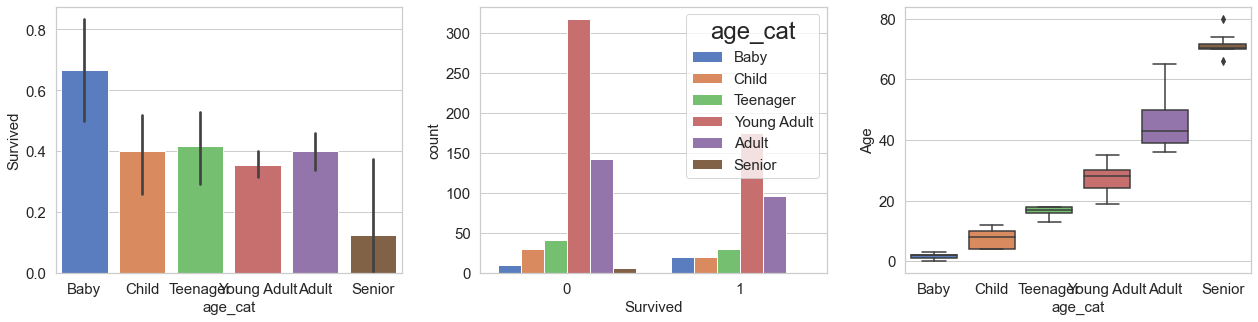

In [88]:
# plot
plt.figure(figsize=(18,5))

# barplot: age_cat vs survived
plt.subplot(1,3,1)
sns.barplot(x='age_cat', y='Survived', data=X_train)
# countplot: survived, hue=age_cat
plt.subplot(1,3,2)
sns.countplot('Survived', hue='age_cat', data=X_train)
# boxplot: age vs age_cat
plt.subplot(1,3,3)
sns.boxplot(x='age_cat', y='Age', data=X_train)

plt.tight_layout()


- babies survived the most and the highest death rate on senior
- young adult and adult died the most and survived the most at the same time
- yound adult and senior have the highest death rate

### 5) Person Type
child vs. male vs. female

In [89]:
def get_person(X):
    age, sex = X
    return 'child' if age < 16 else sex

for x in X_full:
    x['person'] = x[['Age', 'Sex']].apply(get_person, axis=1)

X_train[['person', 'Age', 'Sex']][886:]

,person,Age,Sex
886,male,27,male
887,female,19,female
888,child,14,female
889,male,26,male
890,male,32,male


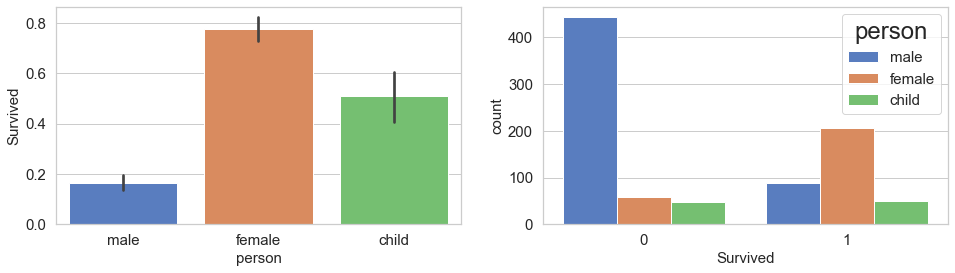

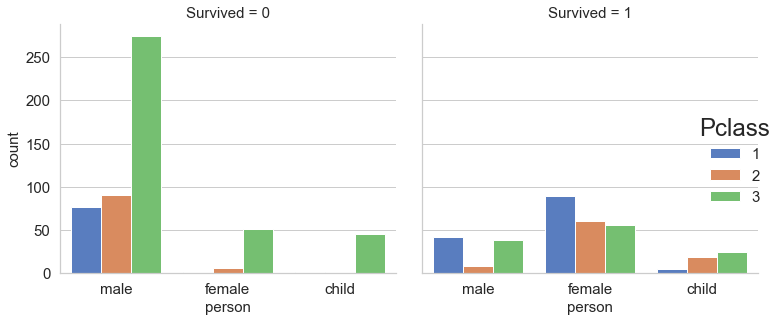

In [90]:
# plot
plt.figure(figsize=(16,4))
# barplot: person vs survived
plt.subplot(1,2,1)
sns.barplot(x='person', y='Survived', data=X_train)
# countplot: survived, hue=person
plt.subplot(1,2,2)
sns.countplot('Survived', hue='person', data=X_train)
# factorplot: person , col=pclass
sns.factorplot(x='person', col='Survived', hue='Pclass', data=X_train, kind='count')


plt.tight_layout()

### 6) Fare Feature

Although there now are no missing FarePP’s anymore, I also noticed that 17 Fares actually have the value 0. These people are not children that might have traveled for free. I think the information might actually be correct (have people won free tickets?), but I also think that the zero-Fares might confuse the algorithm. For instance, there are zero-Fares within the 1st class passengers. To avoid this possible confusion, I am replacing these values by the median FarePP’s for each Pclass.

Above you can see that the **Fare is very skewed**. I know that this is not desirable for some algorithms, and can be solved by taking the **logarithm or normalisation**

Another option is to use **Fare Groups** instead of keeping the FarePerPerson as a numeric variable.

In [91]:
X_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,cabin_bool,Deck,Family_size,Alone,Surname,Large_family,Title,age_cat,Age*Pclass,person
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Other,...,0,Other,2,0,Braund,0,Mr,Young Adult,66,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,...,1,C,2,0,Cumings,0,Mrs,Adult,38,female


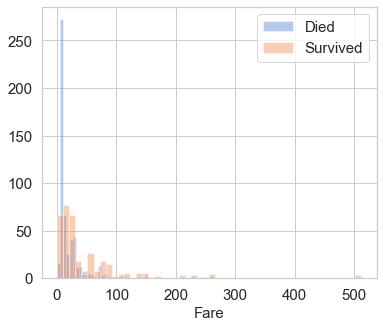

In [92]:
# highly right (positively: mode > median > mean) skewed => need to transform logorithm or normalization
plt.figure(figsize=(6,5))
sns.distplot(X_train[X_train['Survived']==0].Fare.dropna(), bins=50, label='Died', kde=False)
sns.distplot(X_train[X_train['Survived']==1].Fare.dropna(), bins=50, label='Survived', kde=False)
plt.legend()

In [93]:
# Number of fares wtih zeros
len(X_train[X_train['Fare'] == 0])

15

In [94]:
df_zero_fare = X_train[X_train['Fare']==0].reset_index()
df_zero_fare[['Fare', 'Pclass']]

,Fare,Pclass
0,0.0,3
1,0.0,1
2,0.0,3
3,0.0,2
4,0.0,3
5,0.0,2
6,0.0,2
7,0.0,2
8,0.0,3
9,0.0,1


In [95]:
X_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [96]:
# create fare_group(.cat.codes: convert dtype from 'category' to 'int8'=> when does it, the value of label goes down by 1. thus we need to add 1 to labels to generate the correct labels.
fare_group = pd.cut(X_train['Fare_group'], 
                   [-1, 7.91, 14.454, 31, 99, 250, 520],
                   labels=[0, 1, 2, 3, 4, 5])

for x in X_full:
    x['fare_group'] = fare_group
    x['fare_group'] = x['fare_group'].cat.codes  # convert dtype from 'category' to 'int8'

print(X_train[['fare_group', 'Fare_group']].info())
X_train[['fare_group', 'Fare_group']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fare_group  891 non-null    int8   
 1   Fare_group  891 non-null    float64
dtypes: float64(1), int8(1)
memory usage: 8.0 KB
None


,fare_group,Fare_group
0,0,7.2500
1,3,71.2833
2,1,7.9250
3,3,53.1000
4,1,8.0500


### 7) Mapping
convert **categorical** values to **numeric** values for both X_train and X_test dataset

In [97]:
print(X_train.columns)
X_train.head(2)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Fare_group', 'cabin_bool', 'Deck',
       'Family_size', 'Alone', 'Surname', 'Large_family', 'Title', 'age_cat',
       'Age*Pclass', 'person', 'fare_group'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck,Family_size,Alone,Surname,Large_family,Title,age_cat,Age*Pclass,person,fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Other,...,Other,2,0,Braund,0,Mr,Young Adult,66,male,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,...,C,2,0,Cumings,0,Mrs,Adult,38,female,3


In [98]:
print(X_train['Sex'].unique())
print(X_train['Title'].unique())
print(X_train['person'].unique())
print(X_train['age_cat'].unique())
print(X_train['Deck'].unique())
print(X_train['Embarked'].unique())

['male' 'female']
['Mr' 'Mrs' 'Miss' 'Master' 'Noble' 'Officer']
['male' 'female' 'child']
['Young Adult', 'Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (6, object): ['Baby' < 'Child' < 'Teenager' < 'Young Adult' < 'Adult' < 'Senior']
['Other' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['S' 'C' 'Q']


In [99]:
sex_map = {'female': 0, 'male':1}
title_map = {'Mr':1, 'Mrs':2, 'Miss':3,'Master':4, 'Noble':5, 'Officer':6}
person_map = {'male':0, 'female':1, 'child':2}
age_cat_map = {'Baby':1, 'Child':2, 'Teenager':3, 'Young Adult':4, 'Adult':5, 'Senior':6}
deck_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'Other':9}
Embarked_map = {'C':1, 'S':2, 'Q':3}

for x in X_full:
    x['Sex'] = x['Sex'].map(sex_map)
    x['Title'] = x['Title'].map(title_map)
    x['person'] = x['person'].map(person_map)
    x['age_cat'] = x['age_cat'].map(age_cat_map)
    x['Deck'] = x['Deck'].map(deck_map)
    x['Embarked'] = x['Embarked'].map(Embarked_map)

print(X_train.columns)
X_train.head(2)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Fare_group', 'cabin_bool', 'Deck',
       'Family_size', 'Alone', 'Surname', 'Large_family', 'Title', 'age_cat',
       'Age*Pclass', 'person', 'fare_group'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck,Family_size,Alone,Surname,Large_family,Title,age_cat,Age*Pclass,person,fare_group
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,Other,...,9,2,0,Braund,0,1,4,66,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C,...,3,2,0,Cumings,0,2,5,38,1,3


In [100]:
print(X_test.columns)
X_test.head(2)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_group', 'cabin_bool',
       'Deck', 'Family_size', 'Alone', 'Surname', 'Large_family', 'Title',
       'age_cat', 'Age*Pclass', 'person', 'fare_group'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck,Family_size,Alone,Surname,Large_family,Title,age_cat,Age*Pclass,person,fare_group
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,Other,...,9,1,1,Kelly,0,1,4,102,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,Other,...,9,2,0,Wilkes,0,2,5,141,1,3


In [101]:
# drop features that we won't consider to run model for prediction

X_train.drop(['Name','Ticket','Cabin','Surname'], axis=1, inplace=True)
X_test.drop(['PassengerId','Name','Ticket','Cabin','Surname'], axis=1, inplace=True)

X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_group,cabin_bool,Deck,Family_size,Alone,Large_family,Title,age_cat,Age*Pclass,person,fare_group
0,3,1,34,0,0,7.8292,3,7.8292,0,9,1,1,0,1,4,102,0,0
1,3,0,47,1,0,7.0000,2,7.0000,0,9,2,0,0,2,5,141,1,3
2,2,1,62,0,0,9.6875,3,9.6875,0,9,1,1,0,1,4,124,0,1


### 8) Normalizing Data

In [102]:
# Feature Scaling (max-min normalization)

def min_max_norm(df, feat_to_norm, normalized_feat):
    df[normalized_feat] =  df[feat_to_norm].apply(lambda x: (x-np.min(x))/(np.max(x) - np.min(x)))
    return df

X_train = min_max_norm(X_train,['Fare','Age'], ['Fare_norm','Age_norm'])  
X_test = min_max_norm(X_test,['Fare','Age'], ['Fare_norm','Age_norm'])  

X_train[['Fare', 'Age','Fare_norm','Age_norm']].head()
X_test[['Fare', 'Age','Fare_norm','Age_norm']].head()
# print(X_train.columns)
# X_train.drop(['Fare', 'Age'], axis=1, inplace=True)
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_group,cabin_bool,...,Family_size,Alone,Large_family,Title,age_cat,Age*Pclass,person,fare_group,Fare_norm,Age_norm
0,0,3,1,22,1,0,7.2500,2,7.2500,0,...,2,0,0,1,4,66,0,0,0.014151,0.2750
1,1,1,0,38,1,0,71.2833,1,71.2833,1,...,2,0,0,2,5,38,1,3,0.139136,0.4750
2,1,3,0,26,0,0,7.9250,2,7.9250,0,...,1,1,0,3,4,78,1,1,0.015469,0.3250
3,1,1,0,35,1,0,53.1000,2,53.1000,1,...,2,0,0,2,4,35,1,3,0.103644,0.4375
4,0,3,1,35,0,0,8.0500,2,8.0500,0,...,1,1,0,1,4,105,0,1,0.015713,0.4375


In [103]:
# Feature Scaling (z-score normalization)
def z_score_norm(df, feat_to_norm, normalized_feat):
    df[normalized_feat] = df[feat_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))
    return df

X_train = z_score_norm(X_train,['Fare','Age'], ['Fare_standarized','Age_standarized'])
X_test = z_score_norm(X_test,['Fare','Age'], ['Fare_standarized','Age_standarized'])

X_train[['Fare','Age','Fare_standarized','Age_standarized']].head()
X_test[['Fare','Age','Fare_standarized','Age_standarized']].head()

,Fare,Age,Fare_standarized,Age_standarized
0,7.8292,34,-0.497071,0.338026
1,7.0000,47,-0.511934,1.340664
2,9.6875,62,-0.463762,2.497554
3,8.6625,27,-0.482135,-0.201856
4,12.2875,22,-0.417159,-0.587486


Text(0.5, 1.0, 'Age AFTER z-score normalization')

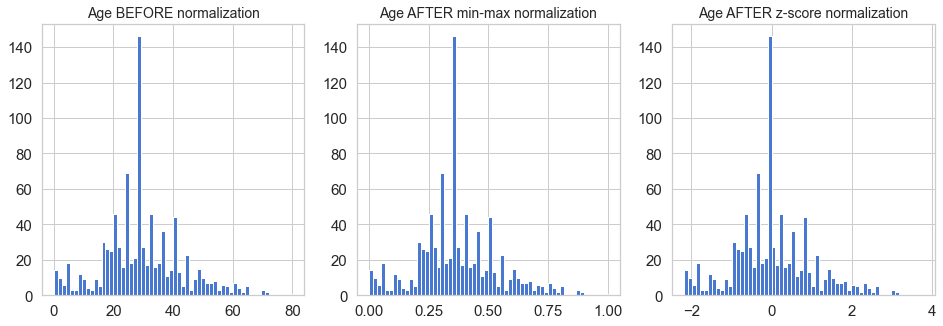

In [104]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
ax=axes[0]
X_train['Age'].hist(bins=60, ax=ax)
ax.set_title('Age BEFORE normalization', fontsize=14)

ax=axes[1]
X_train['Age_norm'].hist(bins=60, ax=ax)
ax.set_title('Age AFTER min-max normalization', fontsize=14)

ax=axes[2]
X_train['Age_standarized'].hist(bins=60, ax=ax)
ax.set_title('Age AFTER z-score normalization', fontsize=14)

### Feature Selection
A set of Features to be used in the following models

In [105]:
# we will use only 'Fare_norm' and 'Age_norm' thus drop 'Fare','Age','Fare_standarized','Age_standarized' columns
cols = ['Fare','Fare_group','Age','Fare_standarized','Age_standarized']

for x in X_full:
    x.drop(cols, axis=1, inplace=True)
    
print(len(X_train.columns), X_train.columns)
print(len(X_test.columns),X_test.columns)

18 Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'cabin_bool',
       'Deck', 'Family_size', 'Alone', 'Large_family', 'Title', 'age_cat',
       'Age*Pclass', 'person', 'fare_group', 'Fare_norm', 'Age_norm'],
      dtype='object')
17 Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'cabin_bool', 'Deck',
       'Family_size', 'Alone', 'Large_family', 'Title', 'age_cat',
       'Age*Pclass', 'person', 'fare_group', 'Fare_norm', 'Age_norm'],
      dtype='object')


In [106]:
print(len(X_train.columns))
X_train.head(3)

18


,Survived,Pclass,Sex,SibSp,Parch,Embarked,cabin_bool,Deck,Family_size,Alone,Large_family,Title,age_cat,Age*Pclass,person,fare_group,Fare_norm,Age_norm
0,0,3,1,1,0,2,0,9,2,0,0,1,4,66,0,0,0.014151,0.275
1,1,1,0,1,0,1,1,3,2,0,0,2,5,38,1,3,0.139136,0.475
2,1,3,0,0,0,2,0,9,1,1,0,3,4,78,1,1,0.015469,0.325


In [107]:
X_test.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,cabin_bool,Deck,Family_size,Alone,Large_family,Title,age_cat,Age*Pclass,person,fare_group,Fare_norm,Age_norm
0,3,1,0,0,3,0,9,1,1,0,1,4,102,0,0,0.015282,0.447368
1,3,0,1,0,2,0,9,2,0,0,2,5,141,1,3,0.013663,0.618421
2,2,1,0,0,3,0,9,1,1,0,1,4,124,0,1,0.018909,0.815789


<AxesSubplot:>

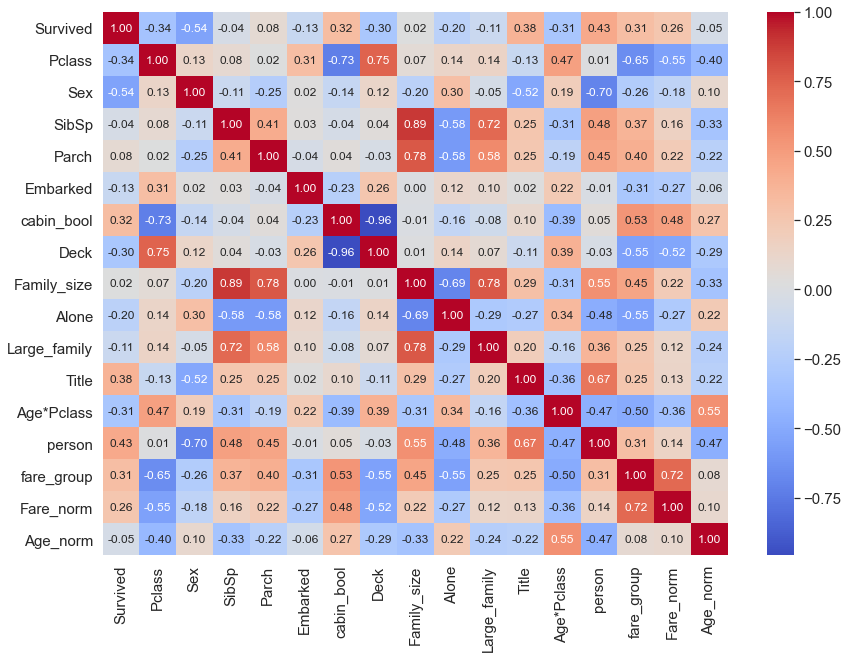

In [108]:
plt.figure(figsize=(14,10))   
sns.heatmap(X_train.corr(), annot=True, annot_kws={'fontsize':12}, cmap='coolwarm',fmt = '.2f')

In [109]:
X_train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,cabin_bool,Deck,Family_size,Alone,Large_family,Title,Age*Pclass,person,fare_group,Fare_norm,Age_norm
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.125953,0.316912,-0.301116,0.016639,-0.203367,-0.113984,0.378177,-0.308991,0.432931,0.307547,0.257307,-0.046616
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,0.305762,-0.725541,0.746616,0.065997,0.135207,0.141167,-0.131676,0.473506,0.010355,-0.653366,-0.549500,-0.403021
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.022521,-0.140391,0.123076,-0.200988,0.303646,-0.046629,-0.520237,0.194813,-0.700155,-0.256491,-0.182333,0.100122
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.030874,-0.040460,0.041540,0.890712,-0.584471,0.721698,0.250574,-0.312052,0.475470,0.368409,0.159651,-0.330771
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,-0.035957,0.036987,-0.032548,0.783111,-0.583398,0.580022,0.246123,-0.187665,0.453368,0.396754,0.216225,-0.217789
Embarked,-0.125953,0.305762,0.022521,0.030874,-0.035957,1.000000,-0.229371,0.255675,0.003138,0.119710,0.095669,0.021279,0.223225,-0.014163,-0.305264,-0.268865,-0.058531
cabin_bool,0.316912,-0.725541,-0.140391,-0.040460,0.036987,-0.229371,1.000000,-0.958054,-0.009175,-0.158029,-0.080793,0.104628,-0.386249,0.049323,0.526565,0.482075,0.266817
Deck,-0.301116,0.746616,0.123076,0.041540,-0.032548,0.255675,-0.958054,1.000000,0.012131,0.142202,0.074201,-0.108521,0.385946,-0.027775,-0.545993,-0.523013,-0.285363
Family_size,0.016639,0.065997,-0.200988,0.890712,0.783111,0.003138,-0.009175,0.012131,1.000000,-0.690922,0.783025,0.294217,-0.307031,0.551462,0.450006,0.217138,-0.334875
Alone,-0.203367,0.135207,0.303646,-0.584471,-0.583398,0.119710,-0.158029,0.142202,-0.690922,1.000000,-0.290645,-0.267949,0.341868,-0.476853,-0.547811,-0.271832,0.220905


In [110]:
# features that are highly correlated with Survived
corr_survived = pd.DataFrame(X_train.corr()['Survived'].sort_values(ascending=False))[1:]
corr_survived

,Survived
person,0.432931
Title,0.378177
cabin_bool,0.316912
fare_group,0.307547
Fare_norm,0.257307
Parch,0.081629
Family_size,0.016639
SibSp,-0.035322
Age_norm,-0.046616
Large_family,-0.113984


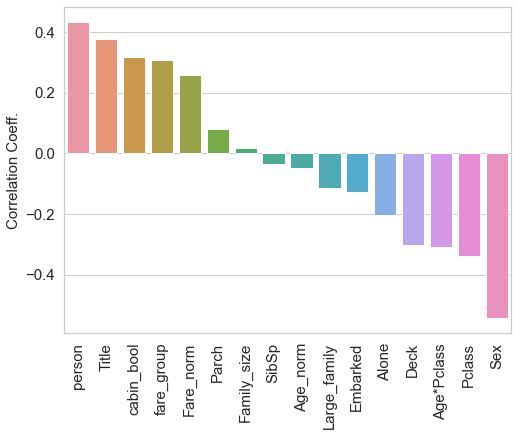

In [111]:
plt.figure(figsize=(8,6))
sns.barplot(x=corr_survived.index, y=corr_survived.Survived)
# plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation Coeff.', fontsize=15)
plt.xticks(rotation=90);

In [112]:
# Drop few more features that have low correlation coeff with 'Survived' feature

X_train.drop(['Family_size','SibSp','Parch','Age_norm','age_cat'], axis=1, inplace=True)
X_test.drop(['Family_size','SibSp','Parch','Age_norm','age_cat'], axis=1, inplace=True)

In [113]:
print(len(X_train.columns))
X_train.head(3)

13


,Survived,Pclass,Sex,Embarked,cabin_bool,Deck,Alone,Large_family,Title,Age*Pclass,person,fare_group,Fare_norm
0,0,3,1,2,0,9,0,0,1,66,0,0,0.014151
1,1,1,0,1,1,3,0,0,2,38,1,3,0.139136
2,1,3,0,2,0,9,1,0,3,78,1,1,0.015469


In [114]:
print(len(X_test.columns))
X_test.head(3)

12


,Pclass,Sex,Embarked,cabin_bool,Deck,Alone,Large_family,Title,Age*Pclass,person,fare_group,Fare_norm
0,3,1,3,0,9,1,0,1,102,0,0,0.015282
1,3,0,2,0,9,0,0,2,141,1,3,0.013663
2,2,1,3,0,9,1,0,1,124,0,1,0.018909


In [115]:
X_train.corr()

,Survived,Pclass,Sex,Embarked,cabin_bool,Deck,Alone,Large_family,Title,Age*Pclass,person,fare_group,Fare_norm
Survived,1.000000,-0.338481,-0.543351,-0.125953,0.316912,-0.301116,-0.203367,-0.113984,0.378177,-0.308991,0.432931,0.307547,0.257307
Pclass,-0.338481,1.000000,0.131900,0.305762,-0.725541,0.746616,0.135207,0.141167,-0.131676,0.473506,0.010355,-0.653366,-0.549500
Sex,-0.543351,0.131900,1.000000,0.022521,-0.140391,0.123076,0.303646,-0.046629,-0.520237,0.194813,-0.700155,-0.256491,-0.182333
Embarked,-0.125953,0.305762,0.022521,1.000000,-0.229371,0.255675,0.119710,0.095669,0.021279,0.223225,-0.014163,-0.305264,-0.268865
cabin_bool,0.316912,-0.725541,-0.140391,-0.229371,1.000000,-0.958054,-0.158029,-0.080793,0.104628,-0.386249,0.049323,0.526565,0.482075
Deck,-0.301116,0.746616,0.123076,0.255675,-0.958054,1.000000,0.142202,0.074201,-0.108521,0.385946,-0.027775,-0.545993,-0.523013
Alone,-0.203367,0.135207,0.303646,0.119710,-0.158029,0.142202,1.000000,-0.290645,-0.267949,0.341868,-0.476853,-0.547811,-0.271832
Large_family,-0.113984,0.141167,-0.046629,0.095669,-0.080793,0.074201,-0.290645,1.000000,0.196337,-0.157341,0.360254,0.246623,0.124240
Title,0.378177,-0.131676,-0.520237,0.021279,0.104628,-0.108521,-0.267949,0.196337,1.000000,-0.359334,0.666976,0.252860,0.133736
Age*Pclass,-0.308991,0.473506,0.194813,0.223225,-0.386249,0.385946,0.341868,-0.157341,-0.359334,1.000000,-0.468107,-0.497983,-0.355449


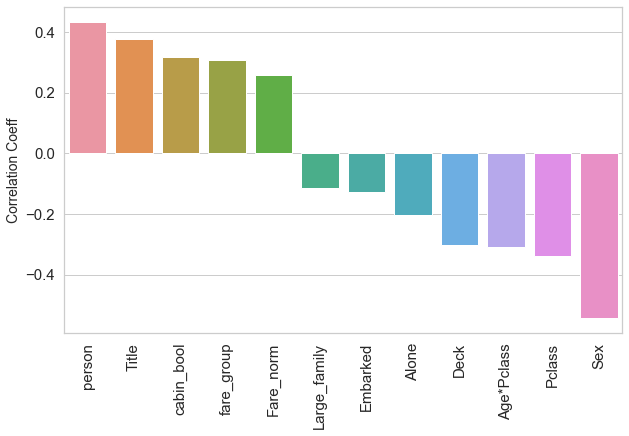

In [116]:
final_corr = pd.DataFrame(X_train.corr()['Survived'].sort_values(ascending=False))[1:]

plt.figure(figsize=(10,6))
sns.barplot(x=final_corr.index, y=final_corr.Survived)
plt.xticks(rotation=90)
plt.ylabel('Correlation Coeff', fontsize=14)

# drop 'Survived' feature as well
X_train.drop('Survived', axis=1, inplace=True)

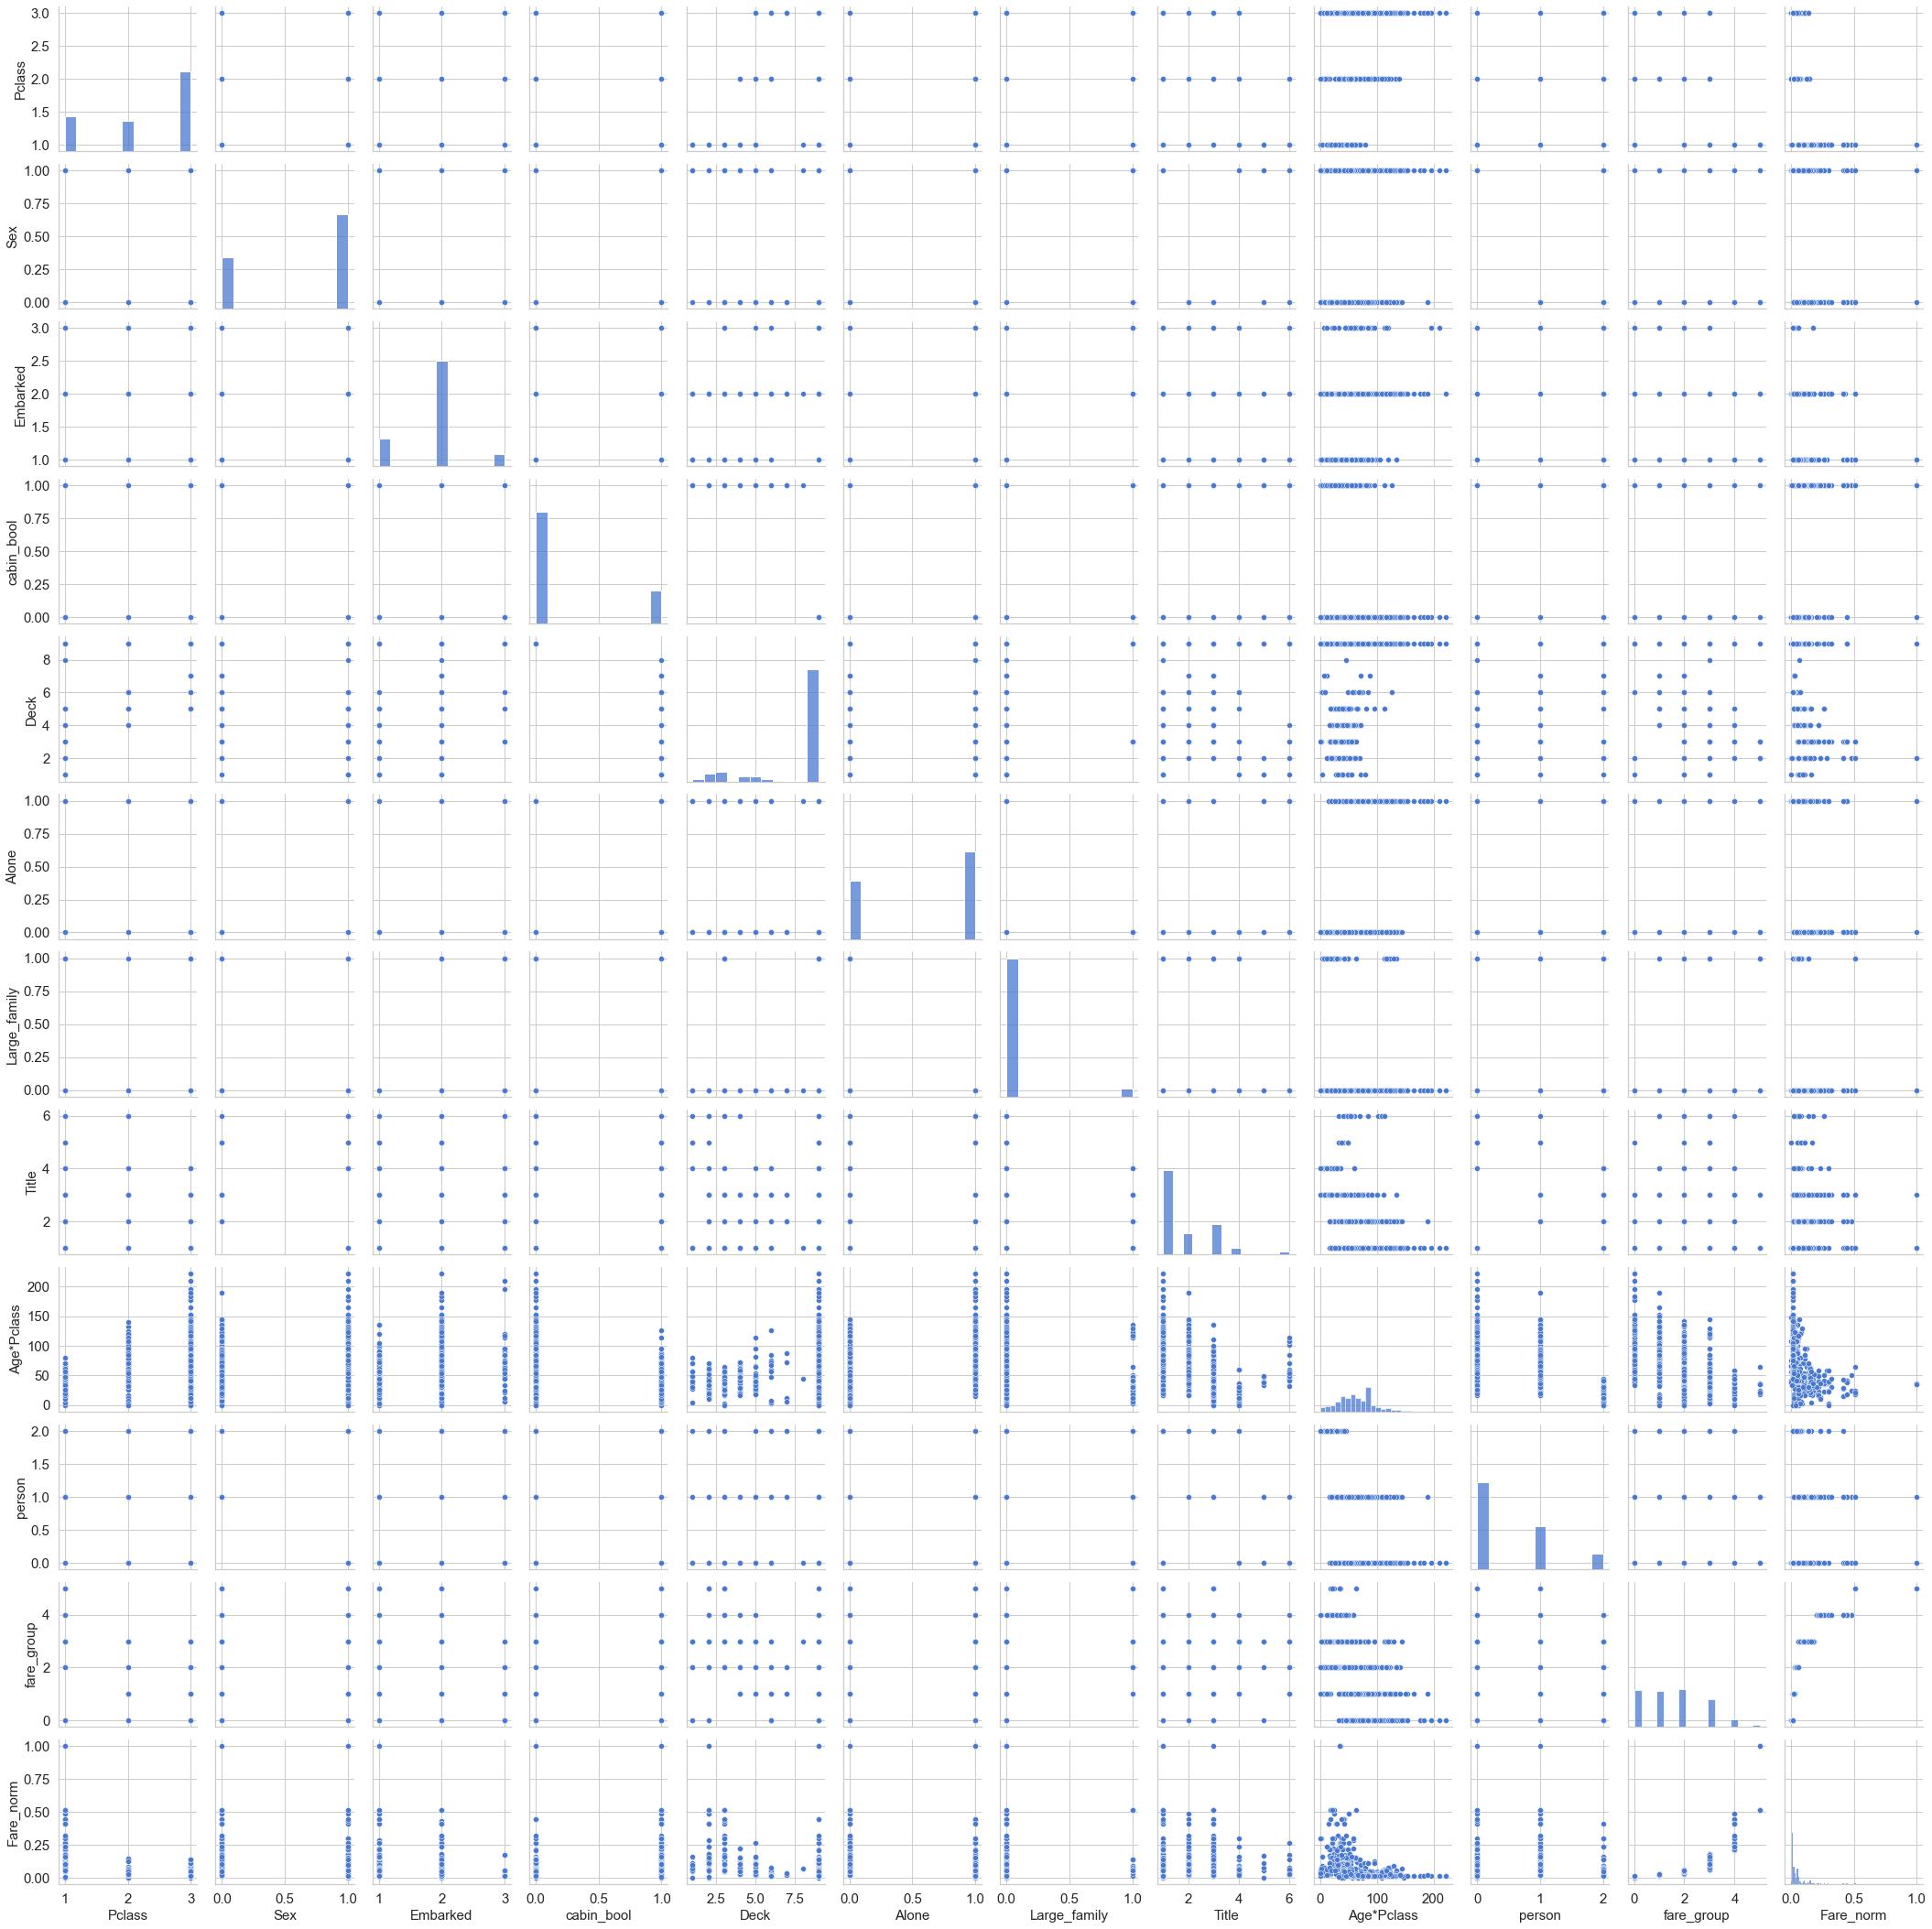

In [117]:
sns.pairplot(X_train)

In [118]:
# from sklearn import preprocessing
# features = pd.concat([X_train.Age, X_train.Fare])
# features

# scaler = preprocessing.MinMaxScaler()
# features_scaled = scaler.fit_transform([features])
# features_new = pd.DataFrame(features_scaled).T
# features_new

In [119]:
# # different way of calculating the normalization in Python
# from sklearn import preprocessing

# def normalization(X_full, feat, new_feat):
#     new_X_full=[]
    
#     for x in X_full:
#         x_array = np.array(x[feat])
#         normalized_x = preprocessing.normalize([x_array])    # has to be 2D array as arg
#         age_norm = pd.DataFrame(normalized_x).T
#         x[new_feat] = age_norm
#         new_X_full.append(x)
        
#     return new_X_full
    
# X_train = normalization(X_full, 'Age', 'Age_norm')[0]   
# X_train = normalization(X_full, 'Fare', 'Fare_norm')[0] 

# X_test = normalization(X_full, 'Age', 'Age_norm')[1]   
# X_test = normalization(X_full, 'Fare', 'Fare_norm')[1]

# X_train[['Age','Age_norm','Fare', 'Fare_norm']].head()   
# X_test[['Age','Age_norm','Fare', 'Fare_norm']].head()   

In [120]:
# # Not sure if the following calculation is correct:
# # different way of calculating the normalization in Python

# def normalization(X):
#     z = (X-np.mean(X))/(np.max(X) - np.min(X))
#     return z

# for x in X_full:
#     x['Fare_norm'] = normalization(x['Fare'])
#     x['Age_norm'] = normalization(x['Age'])

# X_train[['Fare', 'Fare_norm','Age','Age_norm']].head()

[Standardize or Normalize? — Examples in Python](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc)<br>
[Normalization](https://www.codecademy.com/articles/normalization)

<font color=red>**Standardization (= z-score normalization) vs. Normalization (= max-min normalization)**</font>

The goal of normalization is **to make every datapoint have the same scale so each feature is equally important.** 
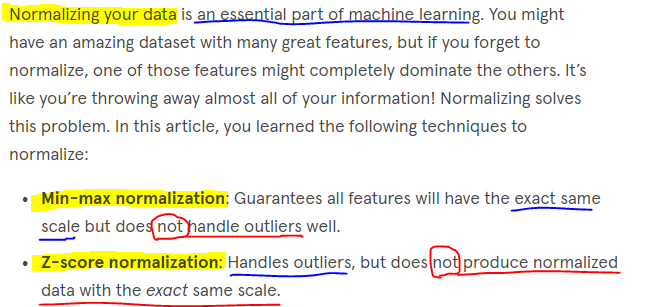

### Normalization = max-min normalization => Why would we normalize in the first place?
1) Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients. Consider the dataset above of housing prices in California, which have features such as the number of bedrooms and the median household income. Each have different units and scales, so consider these feature attributes when going through this article.<br>

2) The use of a normalization method will improve analysis from multiple models. Additionally, if we were to use any algorithms on this data set before we normalized it would be hard (potentially not possible) to converge the vectors because of the scaling issues. Normalization makes the data better conditioned for convergence.<br>

3) Normalizing will ensure that a convergence problem does not have a massive variance, making optimization feasible. <font color=blue>But wait … sometimes you might not want to normalize your data. The data provided is proportional, so normalizing might not provide correct estimators. Or, the scale between your data features does matters so you want to keep in your dataset. You need to think about your data, and understand if the transformations you’re applying are in line with the outcomes you’re searching for. Keep in mind, there is some debate stating it is better to have the input values centred around 0 — standardization — rather than between 0 and 1. So doing your research is important as well, so you understand what type of data is needed by your model.</font><br>

### Standardization = z-score normalization => Why would we standardize in the first place?
1) Compare features that have different units or scales. Consider our data above with housing and income, both have different scales and units. We can start to compare these features and use them in our models once we have standardized them. Later, when you’re running models (logistic regression, SVMs, perceptrons, neural networks etc.) the estimated weights will update similarly rather than at different rates during the build process. This will give you more accurate results when the data has been first standardized.<br>

2) Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved. Consider if you’re doing PCA, the output can only be interpreted correctly when the features have first been centred around their means. Again, understanding what you want to achieve and the model you’ll be using, are necessary conditions to understanding different transformations decisions. However, if you do standardize your data be warned you might be discarding some information. If that information is not needed, the process can be helpful else it will impede your results.<br>

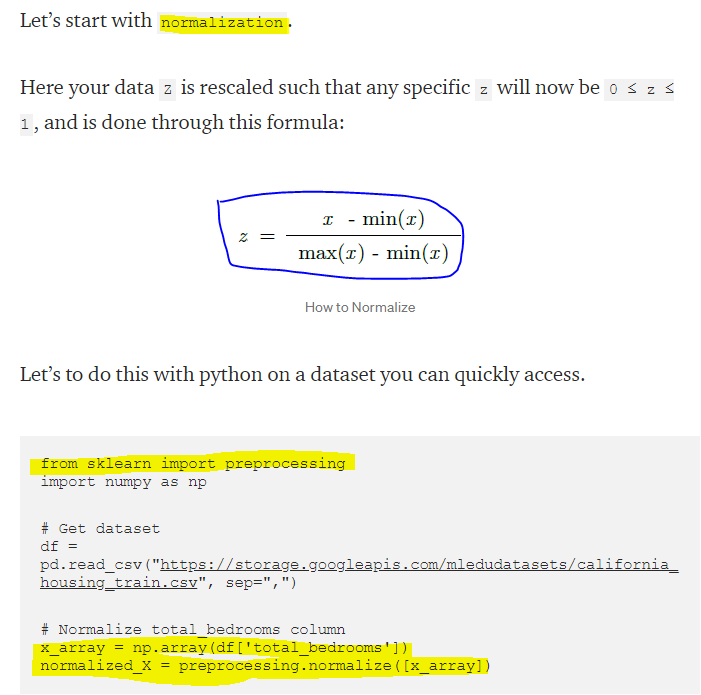

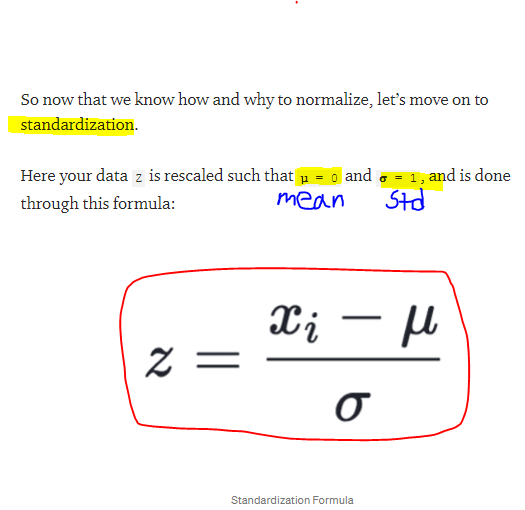

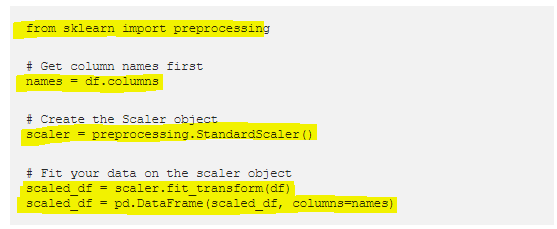

# <font color=blue>PREDICTION MODELS</font>

## Classifier
- Logistic regression
- Naive Bayes
- decision tree
- Boosted Trees
- Random Forest
- Nearest Neighbour
- Support Vector machine
- Neural Network
- Perceptron

## Evaluation of Classification

<font color=blue>**Confusion matrix:**</font> This is the matrix of the actual versus the predicted. This concept is better explained with the example of cancer prediction using the model:

- True positives (TPs): True positives are cases when we predict the disease as yes when the patient actually does have the disease.


- True negatives (TNs): Cases when we predict the disease as no when the patient actually does not have the disease.


- False positives (FPs): When we predict the disease as yes when the patient actually does not have the disease. FPs are also considered to be type I errors.


- False negatives (FNs): When we predict the disease as no when the patient actually does have the disease. FNs are also considered to be type II errors.


- **Accuracy:**  Overall effectivness of a classifier (TP + TN)/(TP + TN + FP + FN)


-  **precision** or positive predictive value (PPV): correct positive labels? (TP)/(TP + FP)


- **Recall**/sensitivity/true positive rate: effectiveness to identify positive labels?
(TP/TP+FN)


- **F1 score (F1):** This is the harmonic mean of the precision and recall.  F1 = 2PR/(P + R)


- specificity, selectivity or true negative rate (TNR): Effectiveness to identify negative labels (TN)/(FP + TN)
(TN/TN+FP)


-  <font color=blue>**Area under Curve (AUC):**</font> Ability to avoid false classiication


- <font color=blue>**Receiver operating characteristic (ROC):**</font> Receiver operating characteristic curve is used to plot between true positive rate (TPR) and false positive rate (FPR), also known as a sensitivity and 1- specificity graph


-  The <font color=blue>**Matthews correlation coefficient**</font> is used in machine learning as a measure of the quality of binary (two-class) classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. 



-  <font color=blue>**Cohen Kappa:**</font> a score that expresses the level of agreement between Observed Accuracy with an Expected Accuracy (random chance). value <= 0 means *no agreement* and close to 1 means almsot perfect agreement (the higher ck value, the higher agreement between the OA and EA. 


-  <font color=blue>**Log loss, aka logistic loss or cross-entropy loss.**</font> This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.


-  <font color=blue>**Zero-One Loss:**</font> return the fraction of misclassifications (float), else it returns the number of misclassifications (int). The best performance is 0.
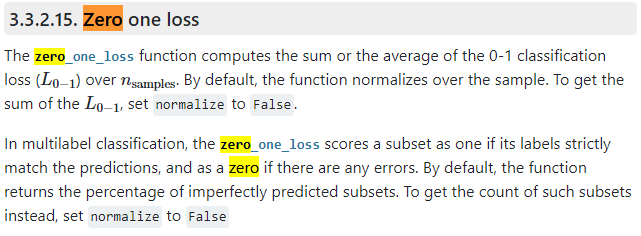

-  <font color=blue>**Hamming Loss:**</font> The Hamming loss is the fraction of labels that are incorrectly predicted.


-  <font color=blue>**Hinge Loss:**</font> The cumulated hinge loss is  an upper bound of the number of mistakes made by the classifier.


-  <font color=blue>**Brier Loss:**</font> measures the mean squared difference between the predicted probability assigned to the possible outcomes and (2) the actual outcome. 

#### ShuffleSplit(n_splits=100, test_size=.25, random_state=0)
- **n_splits:** Number of re-shuffling & splitting iterations (int, default=10)
- **test_size:** Proportion of the dataset to include in the train split. 
- **random_stateint :** Controls the randomness of the training and testing indices produced.

#### np.linspace(start, stop, num=50,endpoint=True, retstep=False, dtype=None, axis=0)
- **n_splits:** Return evenly spaced numbers over a specified interval. Returns num evenly spaced samples, calculated over the interval [start, stop].

In [121]:
# X_train = pd.DataFrame(train.iloc[:, 1:m_train])     # choose all rows and columns except 1st column (column index = 0)
# y_train = pd.DataFrame(train.iloc[:, 1])    # slice ony 2nd column (column index = 1) = 'Survived' as a y-variable
# features = X_train.columns

# X_test_original = test
# X_test = test

# print(features)
# print(y_train.shape) 
# X_train.head(3)

In [122]:
# from sklearn.model_selection import ShuffleSplit
train_sizes = np.linspace(.1, 1, 10)
print(train_sizes)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


- **sklearn.model_selection.cross_val_score:** Evaluate a score by cross-validation
- **numpy.newaxis:** is used to increase the dimension of the existing array by one more dimension, when used once. Thus,1D array will become 2D array, 2D array will become 3D array, 3D array will become 4D array and so on.. Also **np.newaxis** might come in handy when you want to explicitly convert a 1D array to either a row vector or a column vector, as depicted in the above picture.
- **sklearn.metrics.recall_score:** Compute the recall. The recall is the ratio **tp / (tp + fn)** where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the <u>classifier to find all the positive samples.</u>
- **sklearn.metrics.precision_score:** Compute the precision. The precision is the ratio **tp / (tp + fp)** where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the <u>classifier not to label as positive a sample that is negative.</u>
- **sklearn.metrics.accuracy_score:** Accuracy classification score.
- sklearn.metrics.matthews_corrcoef: Compute the Matthews correlation coefficient (MCC).The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

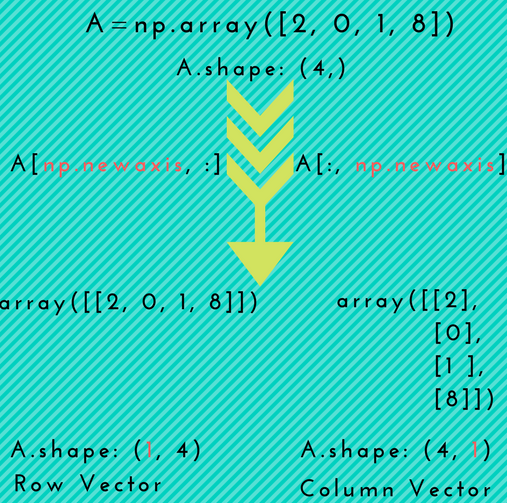

**Precision and Recall Score**
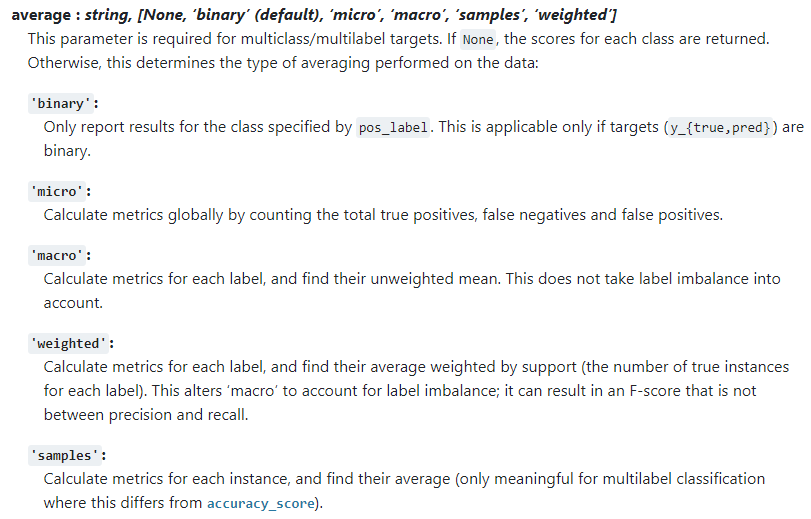

# <font color=red>8 MODELS INTRODUCED</font>
- Logistic Regression
- Gaussian Naive Bayes Classifier
- Decision Tree Classifier
- Extra Trees Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier with Decision Tree Classifier
- KNeighbors Classifier

In [123]:
X_train.head(3)

,Pclass,Sex,Embarked,cabin_bool,Deck,Alone,Large_family,Title,Age*Pclass,person,fare_group,Fare_norm
0,3,1,2,0,9,0,0,1,66,0,0,0.014151
1,1,0,1,1,3,0,0,2,38,1,3,0.139136
2,3,0,2,0,9,1,0,3,78,1,1,0.015469


In [124]:
classes = ['Died(0)', 'Survived(1)']
cv = ShuffleSplit(n_splits=100, test_size=.25, random_state=0)

In [125]:
#  1. train the model (fit and predict)
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)   # can be 'model.predict(X_test)'
    return model, y_pred
   
lr_model, y_pred_lr = train_model(LogisticRegression(), X_train, y_train)
rf_model, y_pred_rf = train_model(RandomForestClassifier(), X_train, y_train)
gb_model, y_pred_gb = train_model(GradientBoostingClassifier(n_estimators=300, random_state=0), X_train, y_train)
dt_model, y_pred_dt = train_model(DecisionTreeClassifier(), X_train, y_train)
ab_model, y_pred_ab = train_model(AdaBoostClassifier(dt_model, random_state=7), X_train, y_train)
et_model, y_pred_et = train_model(ExtraTreesClassifier(), X_train, y_train)
kn_model, y_pred_kn = train_model(KNeighborsClassifier(), X_train, y_train)
nb_model, y_pred_nb = train_model(GaussianNB(), X_train, y_train)
# rf_model

In [126]:
# 2. evaluate the trained model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

def evaluate_model(model, y_pred, model_title, title_abrv):
    # cross-val score
    cv_score = np.median(cross_val_score(model, y_train, y_pred, cv=cv))*100
    
    # confusion matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    perc_conf_mat = conf_mat.astype('float')/conf_mat.sum(axis=1)[:np.newaxis]*100
    df_perc_conf_mat = pd.DataFrame(perc_conf_mat, index=classes, columns=classes)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(df_perc_conf_mat, annot=True, annot_kws={'fontsize':14}, fmt='.2f')
    plt.title('Confusion Matrix(%)', fontsize=14)
    
    # precision, recall, accracy and f1_score
    precision = precision_score(y_train, y_pred, average='macro')*100
    recall = recall_score(y_train, y_pred, average='macro')*100
    accuracy = accuracy_score(y_train, y_pred)*100
    f1score = f1_score(y_train, y_pred, average='macro')*100
    
    # classification_report
    class_report = classification_report(y_train, y_pred, target_names=classes, digits=4)
    
    # cohen_kappa score
    cohen_kappa = cohen_kappa_score(y_train, y_pred)*100
    
    # losses: zero-one loss
    zo_loss = zero_one_loss(y_train, y_pred)*100
    
    print('Model: %s\n'% model_title.upper())
    print('Cross validation score: {:.2f}%'.format(cv_score))
    print('\nPrecision: {:.2f}%'.format(precision))
    print('Recall: {:.2f}%'.format(recall))
    print('Accuracy: {:.2f}%'.format(accuracy))
    print('F1_score: {:.2f}%'.format(f1score))
    print('\nClassification Report (weighted result):\n',class_report) # digits = Number of digits for formatting output floating point values.
    print('\nCohen Kappa: {:.2f}%'.format(cohen_kappa))
    print('Zero-One Loss: {:.2f}%'.format(zo_loss))
    
    model_summary = pd.DataFrame({'Model': title_abrv,
                                 'Cross_val score': cv_score,
                                 'Precision': precision,
                                 'Recall': recall,
                                 'Accuracy': accuracy,
                                 'F1_score': f1score,
                                 'Cohen Kappa': cohen_kappa,
                                 'Zero-One Loss': zo_loss}, index=[0])
    return model_summary

### 1) Logistic Regression
Wikipedia: Logistic Regression is a statistical model that is usually taken to apply to a binary dependent variable. More formally, a logistic model is one where the log-odds of the probability of an event is a linear combination of independent or predictor variables. The two possible dependent variable values are often labelled as "0" and "1", which represent outcomes such as pass/fail, win/lose, Survive/dead or healthy/sick. The binary logistic regression model can be generalized to more than two levels of the dependent variable: categorical outputs with more than two values are modelled by multinomial logistic regression, and if the multiple categories are ordered, by ordinal logistic regression, for example the proportional odds ordinal logistic model. Logistic regression has a high bias and a low variance error.

Model: LOGISTIC REGRESSION CLASSIFIER

Cross validation score: 81.17%

Precision: 80.55%
Recall: 79.64%
Accuracy: 81.37%
F1_score: 80.03%

Classification Report (weighted result):
               precision    recall  f1-score   support

     Died(0)     0.8342    0.8707    0.8520       549
 Survived(1)     0.7767    0.7222    0.7485       342

    accuracy                         0.8137       891
   macro avg     0.8055    0.7964    0.8003       891
weighted avg     0.8121    0.8137    0.8123       891


Cohen Kappa: 60.08%
Zero-One Loss: 18.63%


,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
0,LR,81.165919,80.546775,79.644809,81.369248,80.026738,60.084523,18.630752


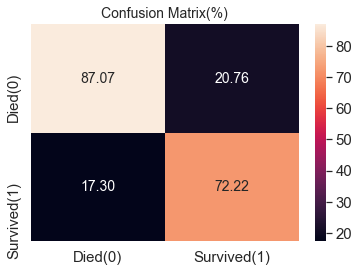

In [127]:
summary_lr = evaluate_model(lr_model, y_pred_lr, 'logistic regression classifier', 'LR')
summary_lr

### 2) Random Forest Classifier
Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

Model: RANDOM FOREST CLASSIFIER

Cross validation score: 98.65%

Precision: 98.87%
Recall: 98.30%
Accuracy: 98.65%
F1_score: 98.57%

Classification Report (weighted result):
               precision    recall  f1-score   support

     Died(0)     0.9803    0.9982    0.9892       549
 Survived(1)     0.9970    0.9678    0.9822       342

    accuracy                         0.9865       891
   macro avg     0.9887    0.9830    0.9857       891
weighted avg     0.9867    0.9865    0.9865       891


Cohen Kappa: 97.14%
Zero-One Loss: 1.35%


,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
0,RFC,98.654709,98.865498,98.300738,98.653199,98.568276,97.136935,1.346801


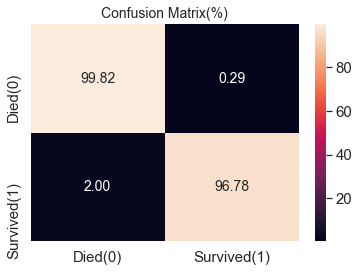

In [128]:
summary_rf = evaluate_model(rf_model, y_pred_rf, 'random forest classifier', 'RFC')
summary_rf

### 3) Gradient Boosting Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Model: GRADIENT BOOSTING CLASSIFIER

Cross validation score: 94.62%

Precision: 94.44%
Recall: 93.43%
Accuracy: 94.28%
F1_score: 93.88%

Classification Report (weighted result):
               precision    recall  f1-score   support

     Died(0)     0.9384    0.9709    0.9543       549
 Survived(1)     0.9505    0.8977    0.9233       342

    accuracy                         0.9428       891
   macro avg     0.9444    0.9343    0.9388       891
weighted avg     0.9430    0.9428    0.9424       891


Cohen Kappa: 87.77%
Zero-One Loss: 5.72%


,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
0,GBC,94.618834,94.442234,93.425846,94.276094,93.882513,87.770969,5.723906


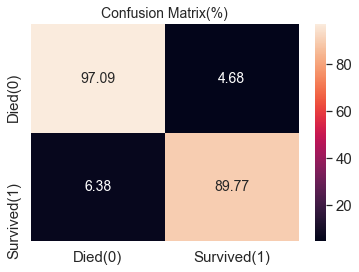

In [129]:
summary_gb = evaluate_model(gb_model, y_pred_gb, 'gradient boosting classifier', 'GBC')
summary_gb

Model: DECISION TREE CLASSIFIER

Cross validation score: 98.65%

Precision: 98.87%
Recall: 98.30%
Accuracy: 98.65%
F1_score: 98.57%

Classification Report (weighted result):
               precision    recall  f1-score   support

     Died(0)     0.9803    0.9982    0.9892       549
 Survived(1)     0.9970    0.9678    0.9822       342

    accuracy                         0.9865       891
   macro avg     0.9887    0.9830    0.9857       891
weighted avg     0.9867    0.9865    0.9865       891


Cohen Kappa: 97.14%
Zero-One Loss: 1.35%


,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
0,DTC,98.654709,98.865498,98.300738,98.653199,98.568276,97.136935,1.346801


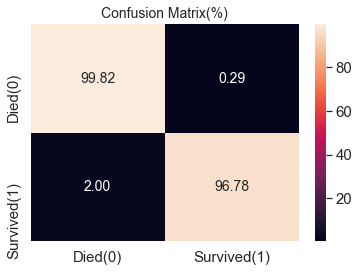

In [130]:
summary_dt = evaluate_model(dt_model, y_pred_dt, 'decision tree classifier', 'DTC')
summary_dt

### 4) AdaBoost with Decision Tree Classifier

Model: ADABOOST WITH DECISION TREE CLASSIFIER

Cross validation score: 98.65%

Precision: 98.43%
Recall: 98.74%
Accuracy: 98.65%
F1_score: 98.58%

Classification Report (weighted result):
               precision    recall  f1-score   support

     Died(0)     0.9945    0.9836    0.9890       549
 Survived(1)     0.9741    0.9912    0.9826       342

    accuracy                         0.9865       891
   macro avg     0.9843    0.9874    0.9858       891
weighted avg     0.9867    0.9865    0.9866       891


Cohen Kappa: 97.16%
Zero-One Loss: 1.35%


,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
0,ABC,98.654709,98.430653,98.741731,98.653199,98.580984,97.162104,1.346801


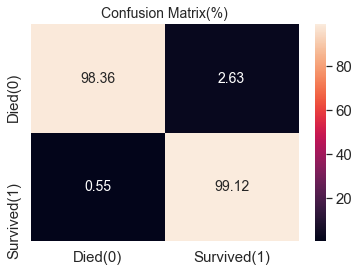

In [131]:
summary_ab = evaluate_model(ab_model, y_pred_ab, 'adaboost with decision tree classifier', 'ABC')
summary_ab

### 5) Extra Trees Classifier

Model: EXTRATREES CLASSIFIER

Cross validation score: 98.65%

Precision: 98.87%
Recall: 98.30%
Accuracy: 98.65%
F1_score: 98.57%

Classification Report (weighted result):
               precision    recall  f1-score   support

     Died(0)     0.9803    0.9982    0.9892       549
 Survived(1)     0.9970    0.9678    0.9822       342

    accuracy                         0.9865       891
   macro avg     0.9887    0.9830    0.9857       891
weighted avg     0.9867    0.9865    0.9865       891


Cohen Kappa: 97.14%
Zero-One Loss: 1.35%


,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
0,ETC,98.654709,98.865498,98.300738,98.653199,98.568276,97.136935,1.346801


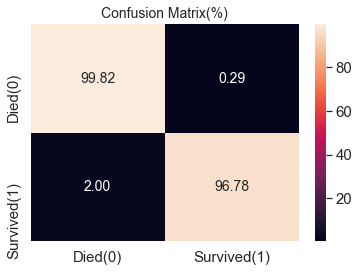

In [132]:
summary_et = evaluate_model(et_model, y_pred_et, 'extratrees classifier', 'ETC')
summary_et

### 6) KNeighbors Classifier (KNN)
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

Model: KNEIGHBORS CLASSIFIER

Cross validation score: 82.96%

Precision: 83.08%
Recall: 81.34%
Accuracy: 83.39%
F1_score: 82.01%

Classification Report (weighted result):
               precision    recall  f1-score   support

     Died(0)     0.8404    0.9016    0.8699       549
 Survived(1)     0.8212    0.7251    0.7702       342

    accuracy                         0.8339       891
   macro avg     0.8308    0.8134    0.8201       891
weighted avg     0.8330    0.8339    0.8317       891


Cohen Kappa: 64.09%
Zero-One Loss: 16.61%


,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
0,KNN,82.959641,83.079976,81.339277,83.38945,82.006681,64.091756,16.61055


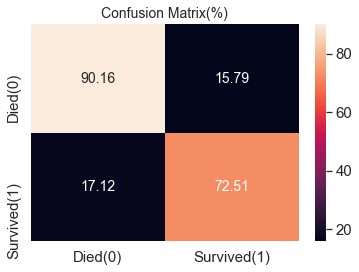

In [133]:
summary_kn = evaluate_model(kn_model, y_pred_kn, 'kneighbors classifier', 'KNN')
summary_kn

### 7) Gaussian Naive Bayes Classifier 

Model: GAUSSIAN NAIVE BAYES CLASSIFIER

Cross validation score: 77.58%

Precision: 75.97%
Recall: 76.55%
Accuracy: 77.22%
F1_score: 76.20%

Classification Report (weighted result):
               precision    recall  f1-score   support

     Died(0)     0.8289    0.7942    0.8112       549
 Survived(1)     0.6904    0.7368    0.7129       342

    accuracy                         0.7722       891
   macro avg     0.7597    0.7655    0.7620       891
weighted avg     0.7757    0.7722    0.7734       891


Cohen Kappa: 52.44%
Zero-One Loss: 22.78%


,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
0,GNB,77.578475,75.965415,76.550666,77.216611,76.201704,52.436513,22.783389


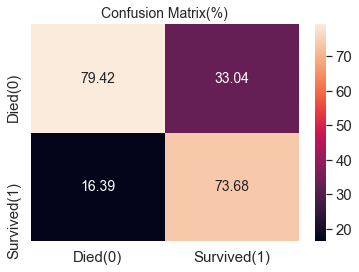

In [134]:
summary_nb = evaluate_model(nb_model, y_pred_nb, 'gaussian naive bayes classifier', 'GNB')
summary_nb

# <font color=blue>COMPARE CLASSIFICATION MODELS</font>
Which is the best model?

In [135]:
dfs = [summary_lr, summary_rf,summary_et,summary_dt,summary_ab,summary_nb,summary_gb,summary_kn]
comp_models = pd.concat(dfs, ignore_index=True)
comp_models = comp_models.sort_values(by='Cross_val score', ascending=False)
comp_models

,Model,Cross_val score,Precision,Recall,Accuracy,F1_score,Cohen Kappa,Zero-One Loss
1,RFC,98.654709,98.865498,98.300738,98.653199,98.568276,97.136935,1.346801
2,ETC,98.654709,98.865498,98.300738,98.653199,98.568276,97.136935,1.346801
3,DTC,98.654709,98.865498,98.300738,98.653199,98.568276,97.136935,1.346801
4,ABC,98.654709,98.430653,98.741731,98.653199,98.580984,97.162104,1.346801
6,GBC,94.618834,94.442234,93.425846,94.276094,93.882513,87.770969,5.723906
7,KNN,82.959641,83.079976,81.339277,83.389450,82.006681,64.091756,16.610550
0,LR,81.165919,80.546775,79.644809,81.369248,80.026738,60.084523,18.630752
5,GNB,77.578475,75.965415,76.550666,77.216611,76.201704,52.436513,22.783389


Text(0.5, 0, 'Cross Validataion score')

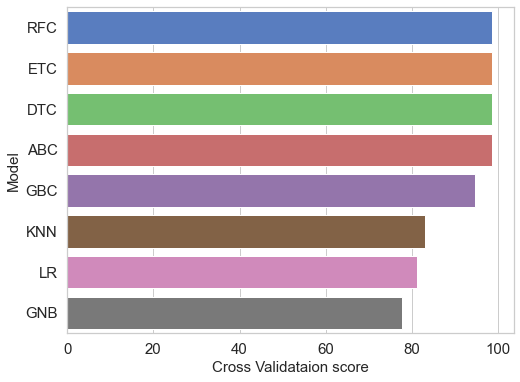

In [136]:
plt.figure(figsize=(8,6))
sns.barplot(x='Cross_val score', y='Model', orient='h', data=comp_models)
plt.xlabel('Cross Validataion score', fontsize=15)

### Voting Classifier
[Voting Classifier](https://medium.com/@sanchitamangale12/voting-classifier-1be10db6d7a5)<br>
Predict if each passenger survived or died for **X_test dataset (len=418)**

In [137]:
comp_models['Model'].unique()

array(['RFC', 'ETC', 'DTC', 'ABC', 'GBC', 'KNN', 'LR', 'GNB'],
      dtype=object)

In [138]:
from sklearn.ensemble import VotingClassifier

estimators = [('LR',lr_model),('RFC',rf_model),('GBC',gb_model),('DTC',dt_model),
               ('ABC',ab_model),('ETC',et_model),('KNN',kn_model),('GNB',nb_model)]

class_voting = VotingClassifier(estimators=estimators, n_jobs=2, voting='soft').fit(X_train, y_train)
y_pred_voting = class_voting.predict(X_test)
y_pred_voting

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# <font color=blue>FINAL OUTPUT - SUBMISSION FILE</font>

In [139]:
X_test_original.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [140]:
X_test_original['PassengerId'][:5]

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [141]:
y_pred_voting = pd.Series(y_pred_voting)   # convert an array to pd.Series
y_pred_voting[:5]

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [142]:
final_output = pd.DataFrame({'PassengerId': X_test_original['PassengerId'],
                            'Survived': y_pred_voting})
final_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1


In [143]:
final_output.to_csv('Titanic_survival_prediction.csv', index=False)
print('Done')

Done


In [144]:
# # ----------------- REFERENCE ----------------------------------
# #     caculate precision, recall, accuracy, and F1 score from the confusion matrix
# tn = conf_mat[0,0]
# tp = conf_mat[1,1]
# fp = conf_mat[0,1]
# fn = conf_mat[1,0]

# precision = tp/(tp+fp)
# recall = tp/(tp+fn)
# # accuracy = (tp+tn)/(tp+tn+fn+fp)
# f1_score = (2*precision*recall)/(precision+recall)

# print('Precision: {:.2f}%'.format(precision*100))
# print('Recall: {:.2f}%'.format(recall*100))
# # print('Accuracy: {:.2f}%'.format(accuracy*100))
# print('F1_score: {:.2f}%'.format(f1_score*100))
# print('*'*50)
# print('\nClassification Report (weighted result):')
# print(classification_report(y_train, y_pred_lr, target_names=classes, digits=4))    # digits = Number of digits for formatting output floating point values.

# print('Logistic regression accuracy score = {:.2f}%'.format(acc_score))
# print('*'*50)
# print('Cross validation score: {:.2f}%'.format(cv_score))
# print(df_perc_conf_mat)
# print('*'*50)

# # Summary = PrintResults(title, model_best,X_train, y, y_train_pred, CV_score, LearnResults, cnf_matrix
# # def PrintResults(title, model,X, y, y_pred, CV_score, LearnResults, cnf_matrix ):

They're going to be different because in cross_val_score, you obtain an accuracy for each of your folds and average them. For each CV fold, your training and tests set are different; so, you obtain different accuracy values for each of them, and it enables you to calculate standard deviation of your accuracies, which is enclosed in parentheses in your image. accuracy_score of sklearn.metrics library calculates the accuracy based on the inputs y_pred and y_true. For example, if you input your entire training set, you'll get accuracy of your entire training set, which is of course slightly different than your CV score.-- I see your point now. So, can we say accuracy_score is the correct way to measure overall prediction accuracy? – It actually depends on what you're trying to measure, all metrics have some meaning, but for final evaluation of how good your model is, use accuracy_score with your test set. (Assuming you're not into precision/recall, or confusion matrix) 